In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
df_path= "/content/drive/MyDrive/Dataset/Traffic_dataset.csv"
df = pd.read_csv(df_path)

#Data Understanding

In [ ]:
df.head(5)

country  level        city  speedKMH  length turnType  \
0      EZ      3        Brno         9     427     NONE   
1      EZ      2        Brno        22    1197     NONE   
2      EZ      3        Brno        19     752     NONE   
3      EZ      3        Brno        18     716     NONE   
4      EZ      2  Ostopovice        44    2784     NONE   

                                 globalid  type        uuid  \
0  {F85FCA68-C289-B1C8-A582-439549210AFC}   NaN   235759408   
1  {D4FB1724-A0B4-02B1-24E9-944851B9AD35}   NaN   630390804   
2  {6C971DD5-820D-691D-534A-297860F10F93}   NaN   635207098   
3  {A002B434-C4C2-575B-8633-9466C050CBEA}   NaN  1227693734   
4  {CC1DE3F1-E0E2-001D-9331-F53C843F982C}   NaN  1090372598   

                          endNode  speed blockingAlertUuid  roadType  delay  \
0                             NaN      3               NaN         2     69   
1          IvanovickÃ© nÃ¡mÄ›stÃ­      6               NaN         7    103   
2  Â» Svitavy / Kr. Pole / Bystrc      5               NaN         2     87   
3                    ÄŒernoviÄ�ky      5               NaN         7     93   
4                      Ostopovice     12               NaN         3    138   

                 street  objectid                   pubMillis  
0  MoravskÃ© nÃ¡mÄ›stÃ­   1548392  2024/04/19 08:47:41.259+00  
1           KaÅ¡tanovÃ¡   1552031  2024/04/23 05:24:32.526+00  
2           PisÃ¡reckÃ¡   1556736  2024/04/25 07:48:35.133+00  
3            OlomouckÃ¡   1562484  2024/04/30 13:33:12.400+00  
4                    D1   1563933  2024/04/29 10:01:57.212+00

In [ ]:
df.describe()

level      speedKMH        length  type          uuid  \
count  10000.000000  10000.000000  10000.000000   0.0  1.000000e+04   
mean       3.048400     10.887900    522.716100   NaN  9.808720e+08   
std        0.850488      9.202152    710.939457   NaN  2.820080e+08   
min        1.000000      0.000000      8.000000   NaN  2.421720e+07   
25%        3.000000      5.000000    227.000000   NaN  7.114703e+08   
50%        3.000000      8.000000    342.000000   NaN  1.093813e+09   
75%        4.000000     14.000000    586.250000   NaN  1.219010e+09   
max        5.000000     83.000000  10198.000000   NaN  1.876973e+09   

              speed      roadType         delay      objectid  
count  10000.000000  10000.000000  10000.000000  1.000000e+04  
mean       3.011000      2.522900    117.141900  2.039554e+06  
std        2.575877      2.140358    111.862523  3.639378e+04  
min        0.000000      1.000000     -1.000000  1.548392e+06  
25%        1.000000      1.000000     78.000000  2.042130e+06  
50%        2.000000      2.000000     97.000000  2.044630e+06  
75%        4.000000      2.000000    120.000000  2.047129e+06  
max       23.000000     20.000000   2084.000000  2.049629e+06

In [ ]:
df.dtypes

country               object
level                  int64
city                  object
speedKMH               int64
length                 int64
turnType              object
globalid              object
type                 float64
uuid                   int64
endNode               object
speed                  int64
blockingAlertUuid     object
roadType               int64
delay                  int64
street                object
objectid               int64
pubMillis             object
dtype: object

In [ ]:
df.isna().sum()

country                  0
level                    0
city                     1
speedKMH                 0
length                   0
turnType                 0
globalid                 0
type                 10000
uuid                     0
endNode               2839
speed                    0
blockingAlertUuid     9693
roadType                 0
delay                    0
street                 389
objectid                 0
pubMillis                0
dtype: int64

In [ ]:
# Drop 'country', 'type', 'endNode', 'globalid', 'uuid', 'objectid' due to high missing rate or irrelevance
df.drop(columns=['country', 'type', 'endNode', 'globalid', 'uuid', 'objectid'], inplace=True)

# Impute 'city' and 'street' with mode
df['city'].fillna(df['city'].mode()[0], inplace=True)
df['street'].fillna(df['street'].mode()[0], inplace=True)

/tmp/ipython-input-1427957805.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['city'].fillna(df['city'].mode()[0], inplace=True)
/tmp/ipython-input-1427957805.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe().T

count   mean    std   min    25%    50%    75%      max
level    10000.00   3.05   0.85  1.00   3.00   3.00   4.00     5.00
speedKMH 10000.00  10.89   9.20  0.00   5.00   8.00  14.00    83.00
length   10000.00 522.72 710.94  8.00 227.00 342.00 586.25 10198.00
speed    10000.00   3.01   2.58  0.00   1.00   2.00   4.00    23.00
roadType 10000.00   2.52   2.14  1.00   1.00   2.00   2.00    20.00
delay    10000.00 117.14 111.86 -1.00  78.00  97.00 120.00  2084.00

In [ ]:
df = df[df['delay'] != -1]

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe().T

count   mean    std   min    25%    50%    75%      max
level    9654.00   2.98   0.78  1.00   3.00   3.00   4.00     4.00
speedKMH 9654.00  11.28   9.13  1.00   6.00   8.00  14.00    83.00
length   9654.00 536.49 719.22 36.00 234.00 351.00 597.00 10198.00
speed    9654.00   3.12   2.56  0.00   2.00   2.00   4.00    23.00
roadType 9654.00   2.49   1.94  1.00   1.00   2.00   2.00    17.00
delay    9654.00 121.38 111.55 19.00  80.00  98.00 121.00  2084.00

In [ ]:
df['level'] = df['level'].astype(int)
df['roadType'] = df['roadType'].astype(int)

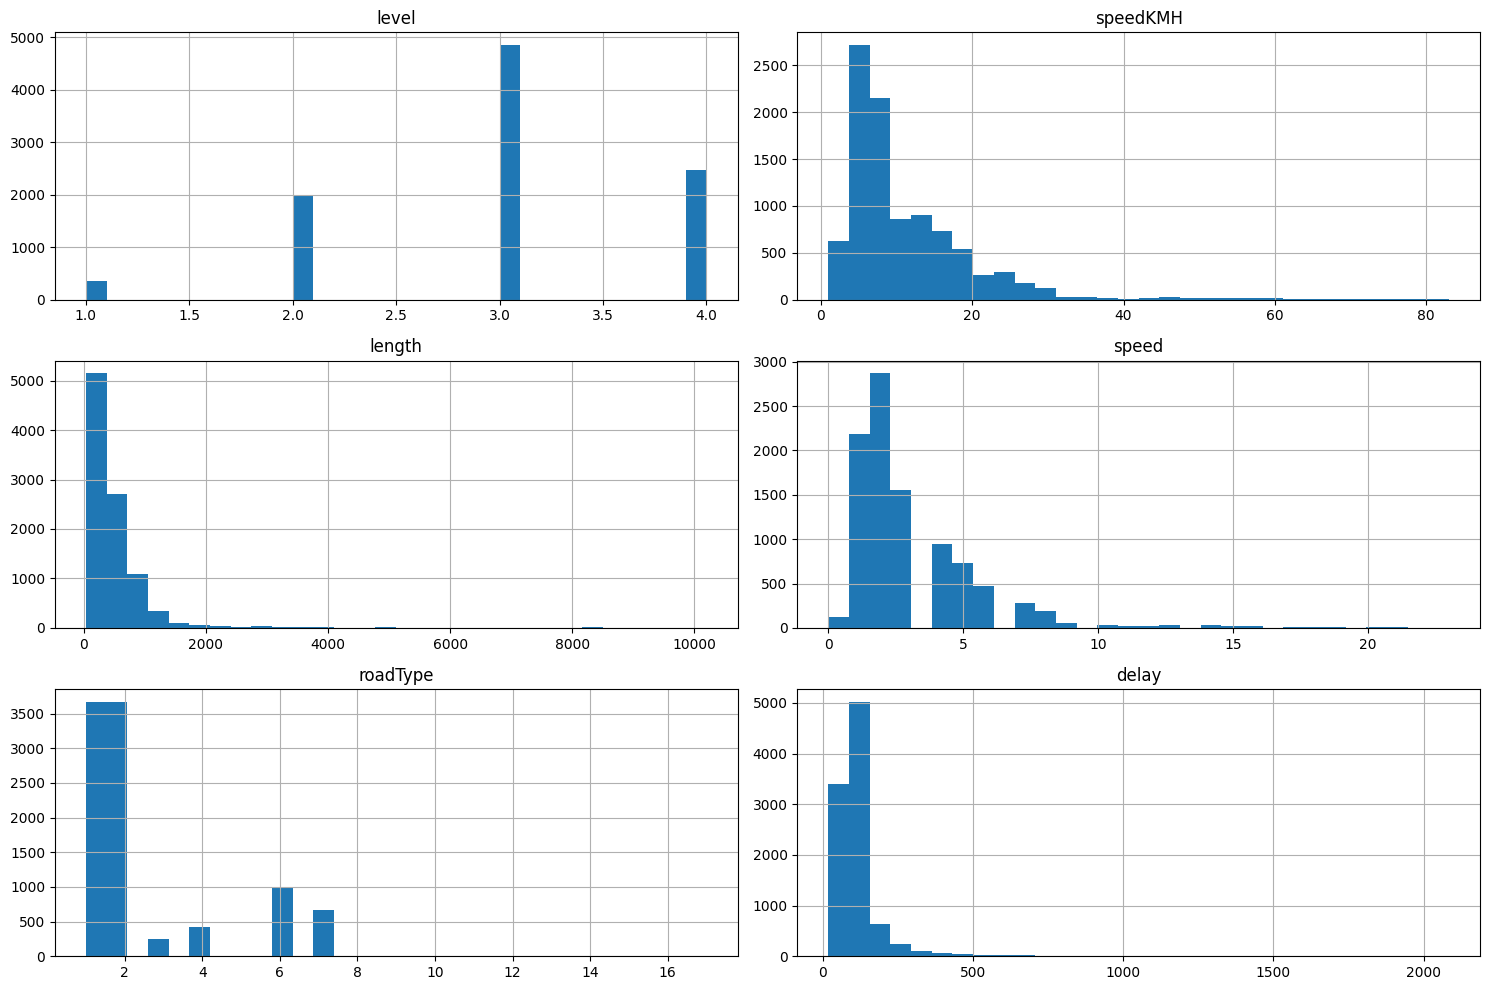

In [ ]:
# Histograms for numeric features
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

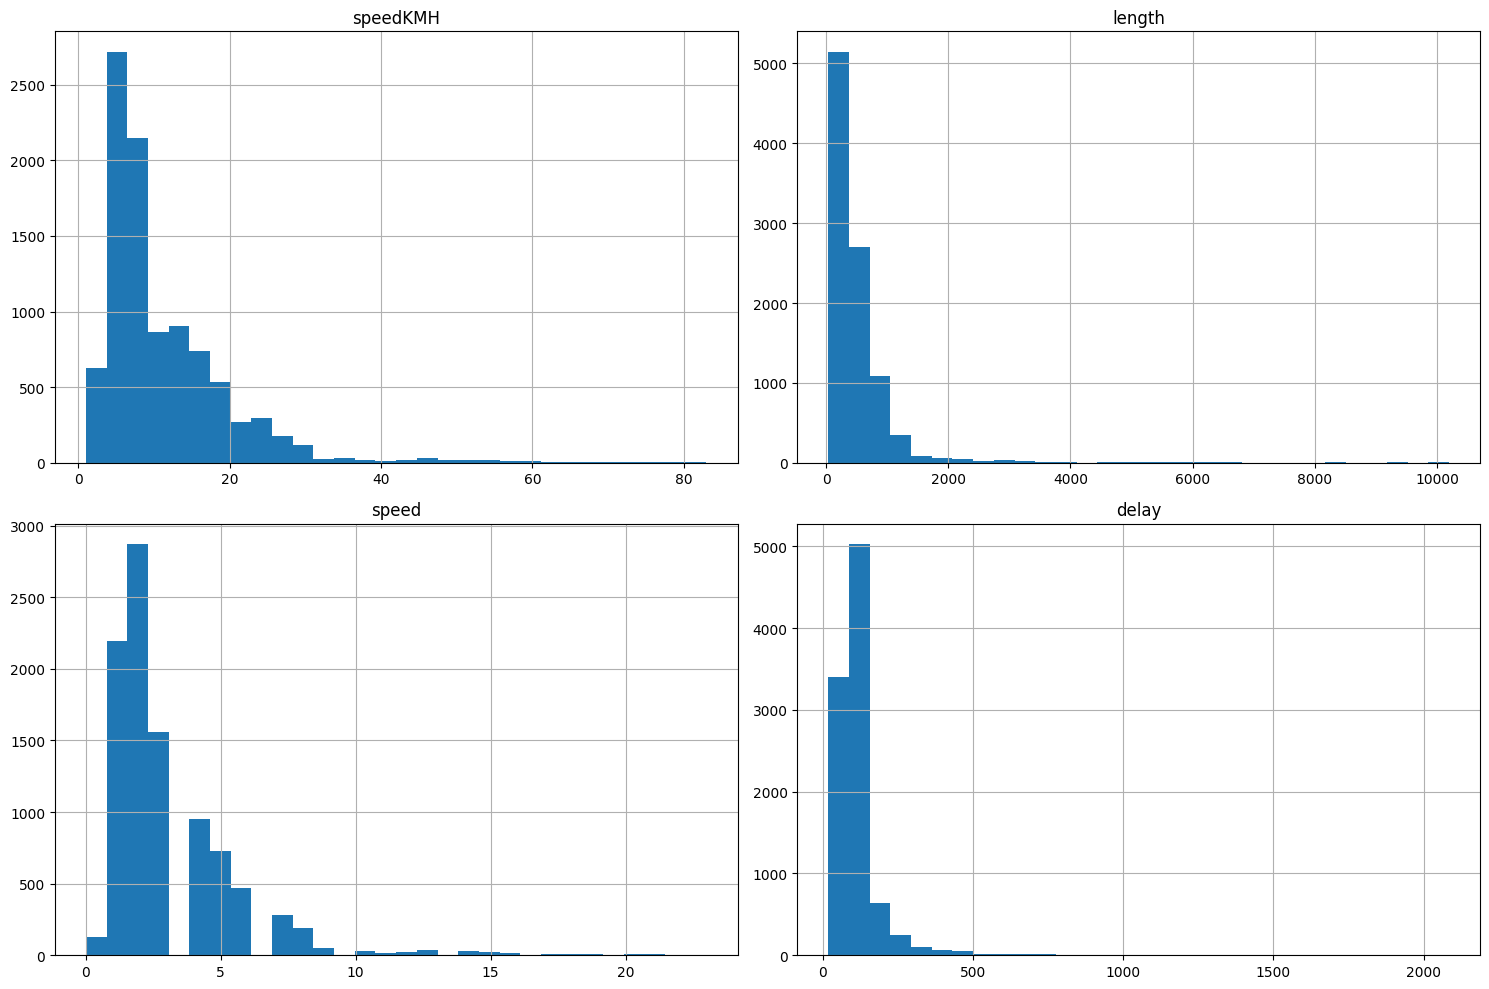

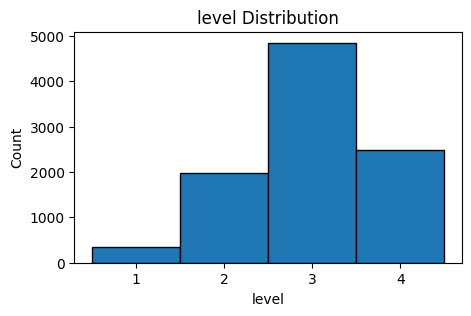

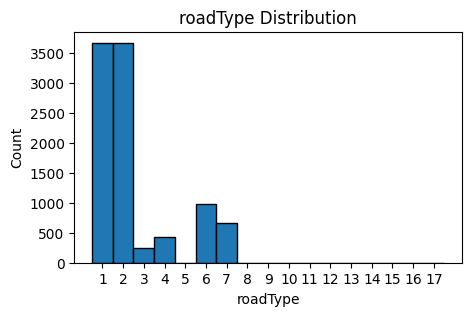

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Separate categorical-like numeric columns
categorical_cols = ['level', 'roadType']
continuous_cols = [col for col in df.select_dtypes(include=[np.number]).columns
                   if col not in categorical_cols]

# Continuous features — standard histogram
df[continuous_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Categorical features — integer-aligned histograms
for col in categorical_cols:
    plt.figure(figsize=(5,3))
    bins = np.arange(df[col].min(), df[col].max() + 2) - 0.5
    plt.hist(df[col], bins=bins, edgecolor='black')
    plt.xticks(np.arange(df[col].min(), df[col].max() + 1))
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

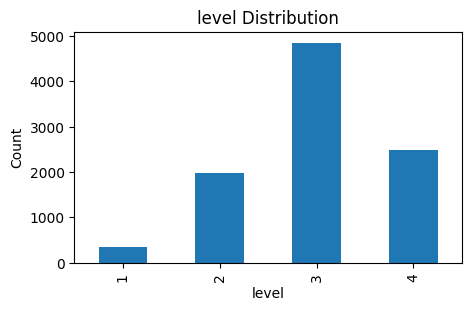

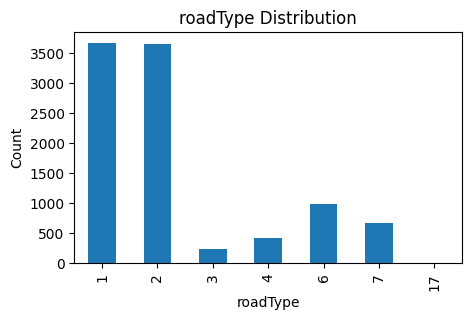

In [ ]:
import matplotlib.pyplot as plt

for col in ['level', 'roadType']:
    plt.figure(figsize=(5,3))
    df[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

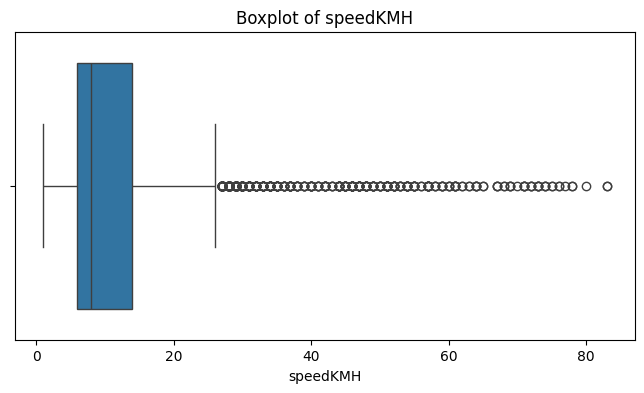

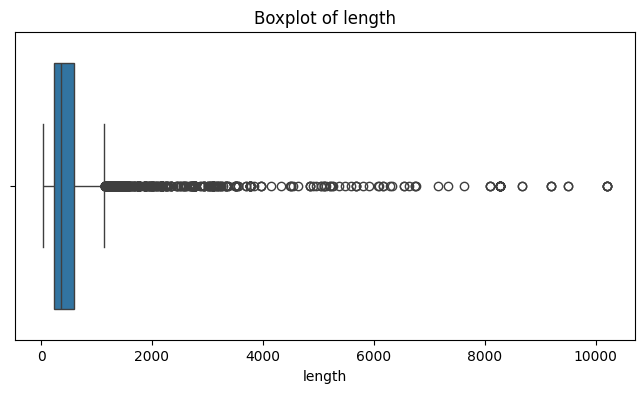

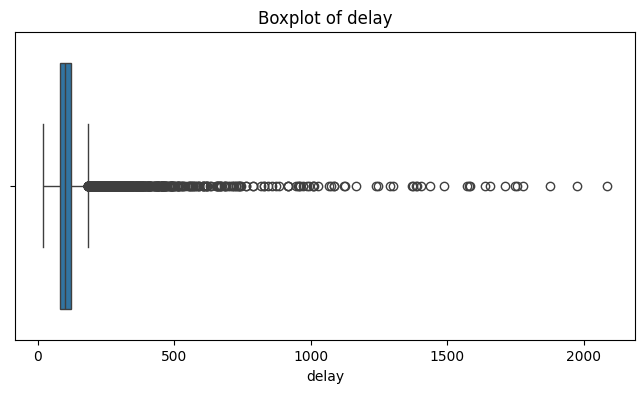

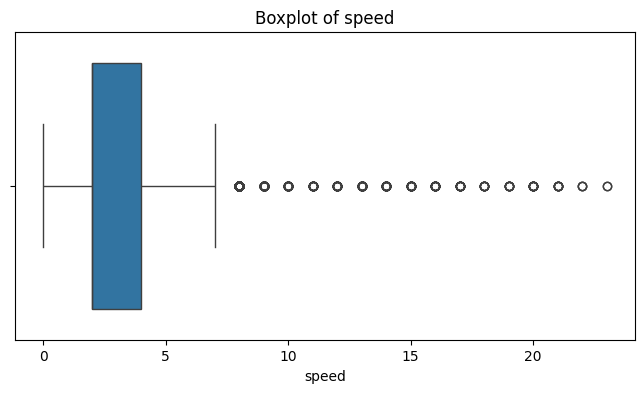

In [ ]:
# Boxplots to detect outliers
for col in ['speedKMH', 'length', 'delay', 'speed']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

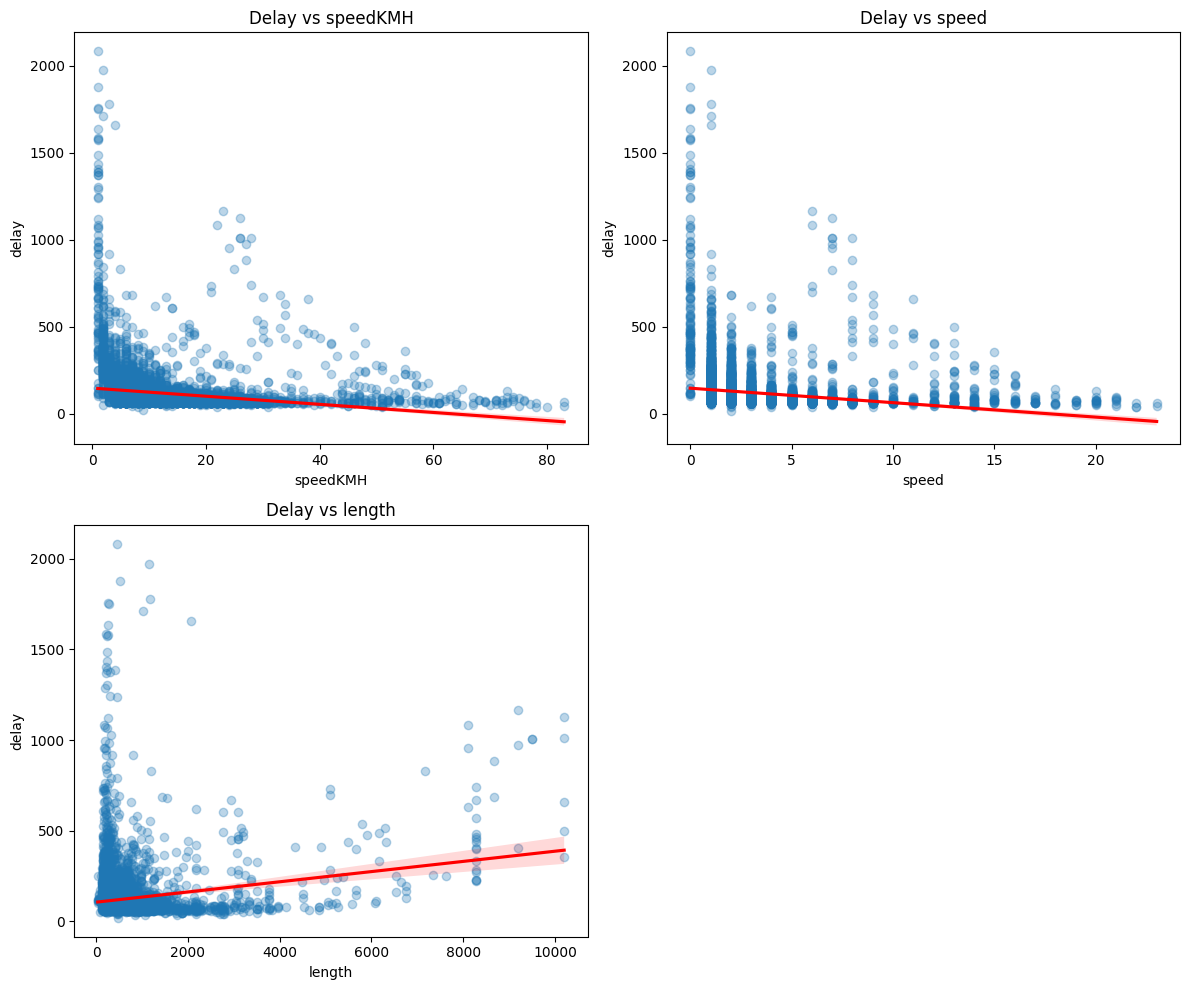

In [ ]:
numeric_features = ['speedKMH', 'speed', 'length']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=df[col], y=df['delay'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title(f'Delay vs {col}')

plt.tight_layout()
plt.show()

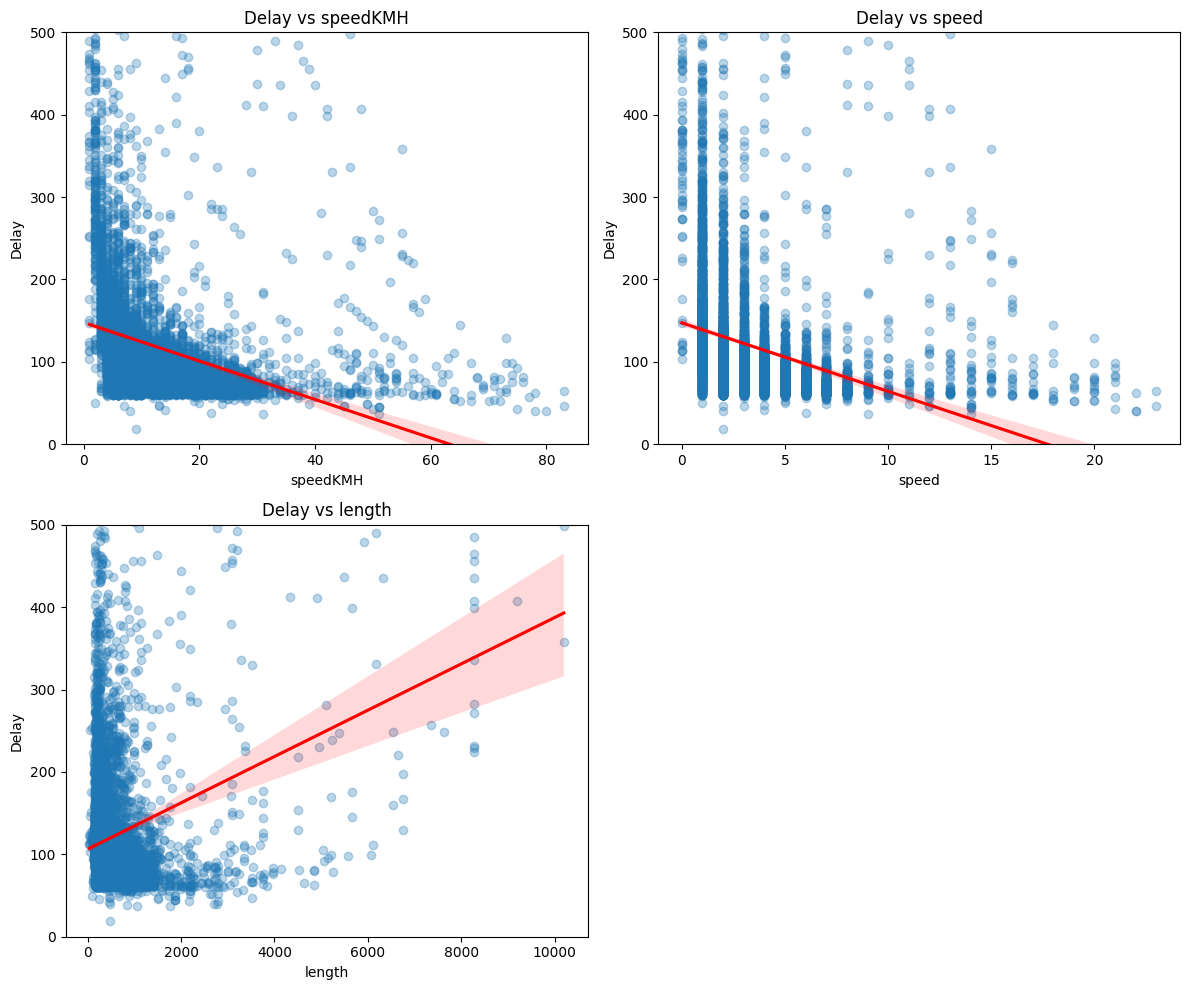

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = ['speedKMH', 'speed', 'length']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)

    sns.regplot(
        x=df[col],
        y=df['delay'],
        scatter_kws={'alpha': 0.3},
        line_kws={'color': 'red'}
    )

    plt.title(f'Delay vs {col}')
    plt.xlabel(col)
    plt.ylabel("Delay")

    # Apply log scale to x-axis
    plt.ylim(0, 500)

plt.tight_layout()
plt.show()

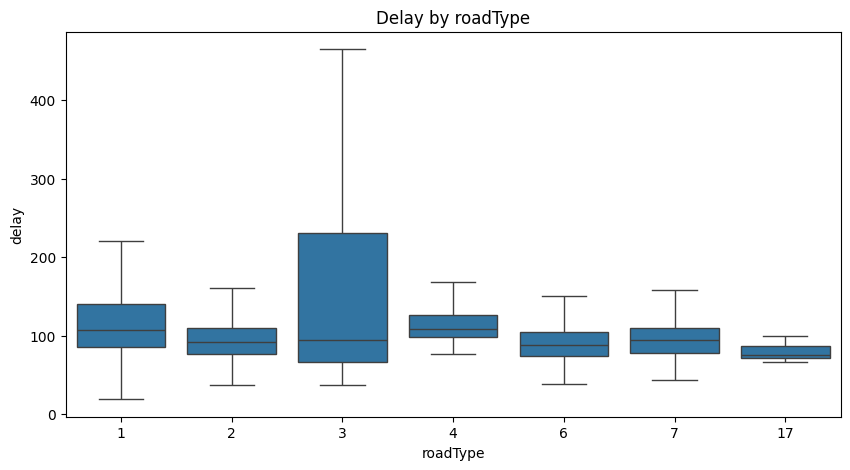

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='roadType', y='delay', data=df, showfliers=False)
plt.title("Delay by roadType")
plt.show()

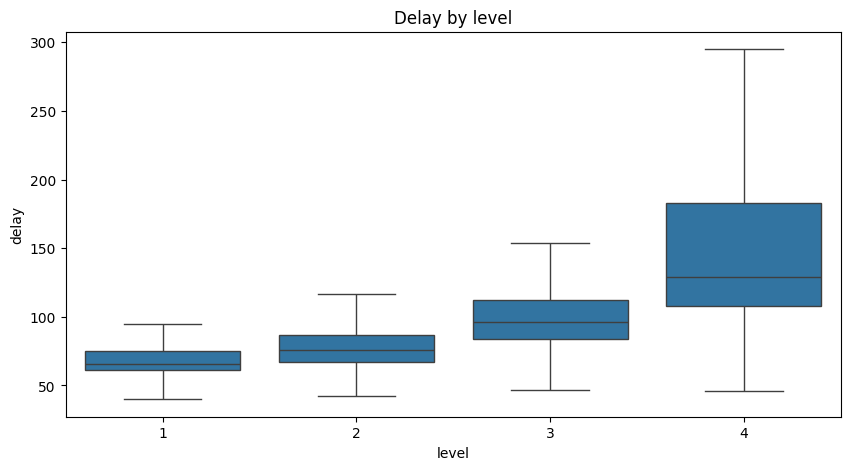

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='level', y='delay', data=df, showfliers=False)
plt.title("Delay by level")
plt.show()

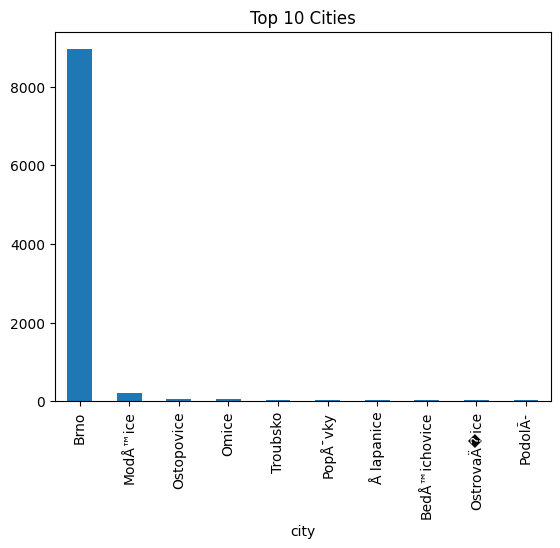

In [ ]:
# Top 10 cities
df['city'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Cities')
plt.show()

In [ ]:
# numeric_cols = ['speedKMH', 'length', 'speed']

# list_out = []

# for col in numeric_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1

#     # Outlier boundaries
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Count outliers
#     outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
#     list_out.append(outlier_count)

# # Create summary dataframe
# out_data = pd.DataFrame({
#     'factor': numeric_cols,
#     'outlier_count': list_out
# })

# print(out_data)

In [ ]:
# # Apply log1p (handles 0 safely)
# for col in numeric_cols:
#     df[f'{col}_log'] = np.log1p(df[col])

In [ ]:
# print(np.isinf(df['delay_log']).sum())

In [ ]:
# df['delay_log'] = df['delay_log'].replace(-np.inf, 0)

In [ ]:
# numeric_features = ['speedKMH_log', 'speed_log', 'length_log']

# plt.figure(figsize=(12, 10))
# for i, col in enumerate(numeric_features, 1):
#     plt.subplot(2, 2, i)
#     sns.regplot(x=df[col], y=df['delay'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
#     plt.title(f'Delay vs {col}')
# plt.tight_layout()
# plt.show()

In [ ]:
# outlier_comparison = []

# for col in numeric_cols:
#     # Original
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     orig_outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col].count()

#     # Log-transformed
#     col_log = f'{col}_log'
#     Q1_log = df[col_log].quantile(0.25)
#     Q3_log = df[col_log].quantile(0.75)
#     IQR_log = Q3_log - Q1_log
#     log_outliers = df[(df[col_log] < Q1_log - 1.5*IQR_log) | (df[col_log] > Q3_log + 1.5*IQR_log)][col_log].count()

#     outlier_comparison.append([col, orig_outliers, log_outliers])

# # Make a DataFrame for easy comparison
# outlier_df = pd.DataFrame(outlier_comparison, columns=['Feature', 'Outliers_Original', 'Outliers_Log'])
# print(outlier_df)

In [ ]:
# sns.histplot(df['delay'], bins=50, kde=True)
# plt.title('Distribution of Delay')
# plt.xlabel('Delay')
# plt.show()

# # After log transform
# sns.histplot(df['delay_log'], bins=50, kde=True)
# plt.title('Distribution of Log(Delay + 1)')
# plt.xlabel('log(delay)')
# plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

high_skewness = ['length']

for col in high_skewness:
    df[f'{col}'] = winsorize(df[col], limits=[0.00, 0.03])

low_skewness = ['speed', 'speedKMH']

for col in low_skewness:
    df[f'{col}'] = winsorize(df[col], limits=[0.00, 0.02])

df['delay'] = pd.Series(
    winsorize(df['delay'], limits=[0.00, 0.04]),
    index=df.index
)

In [ ]:
categorical_cols = ['level', 'roadType', 'turnType', 'city', 'street']

for col in categorical_cols:
    print(f"\n{col} — Unique values: {df[col].nunique()}")
    print(df[col].value_counts().head(10))


level — Unique values: 4
level
3    4847
4    2477
2    1975
1     355
Name: count, dtype: int64

roadType — Unique values: 7
roadType
1     3671
2     3663
6      980
7      670
4      424
3      243
17       3
Name: count, dtype: int64

turnType — Unique values: 1
turnType
NONE    9654
Name: count, dtype: int64

city — Unique values: 44
city
Brno             8949
ModÅ™ice          200
Ostopovice         68
Omice              55
Troubsko           40
PopÅ¯vky           34
Å lapanice         33
BedÅ™ichovice      33
OstrovaÄ�ice       30
PodolÃ­            30
Name: count, dtype: int64

street — Unique values: 858
street
D1                      547
MoravskÃ© nÃ¡mÄ›stÃ­    199
OlomouckÃ¡              197
TÃ¡borskÃ¡              161
VÃ­deÅˆskÃ¡             156
VeveÅ™Ã­                153
Dornych                 143
Å½abovÅ™eskÃ¡           143
HnÄ›vkovskÃ©ho          131
Â» Praha / Svitavy      130
Name: count, dtype: int64


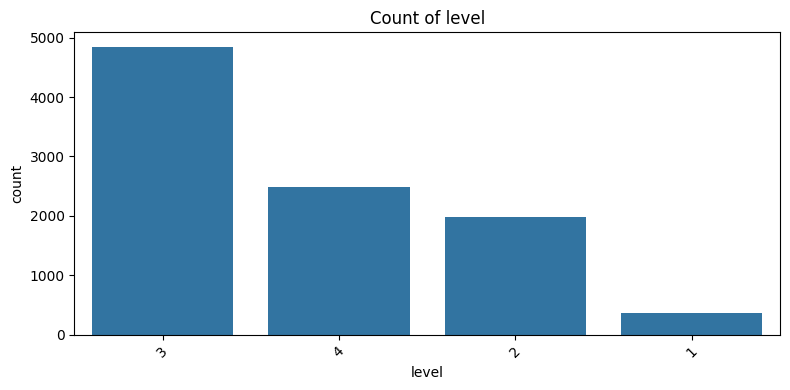

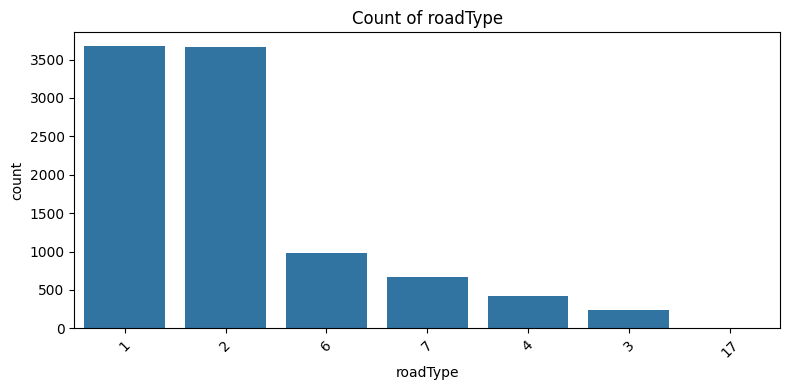

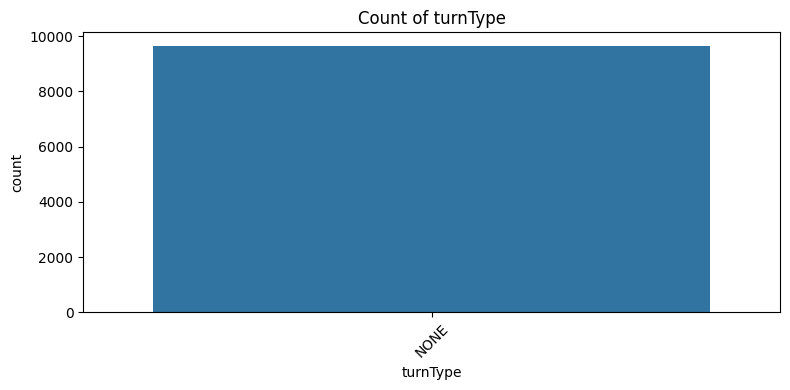

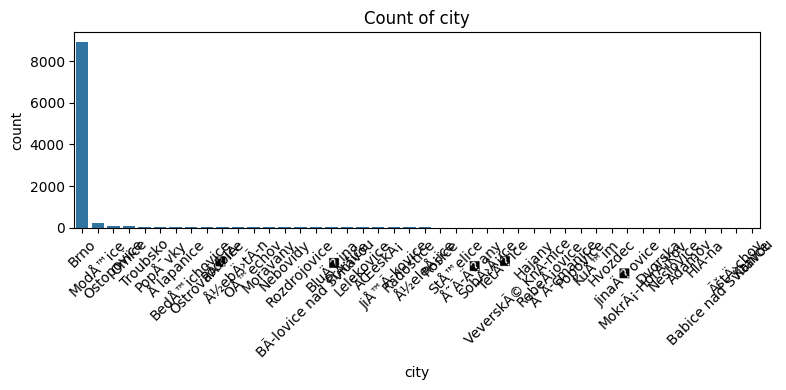

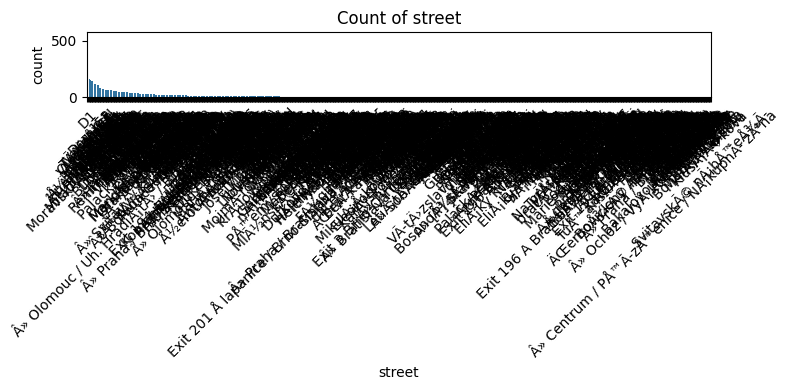

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

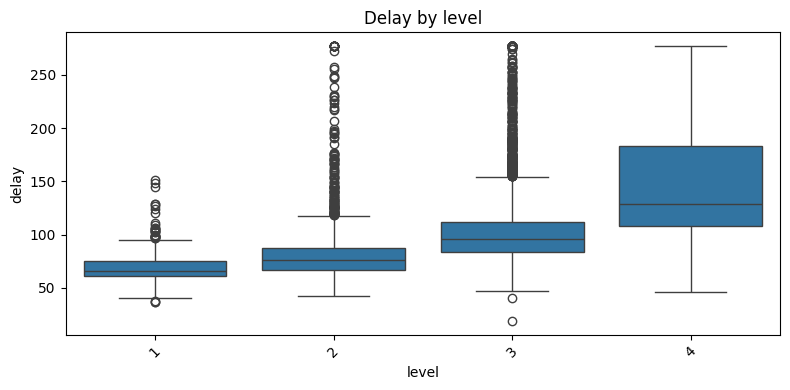

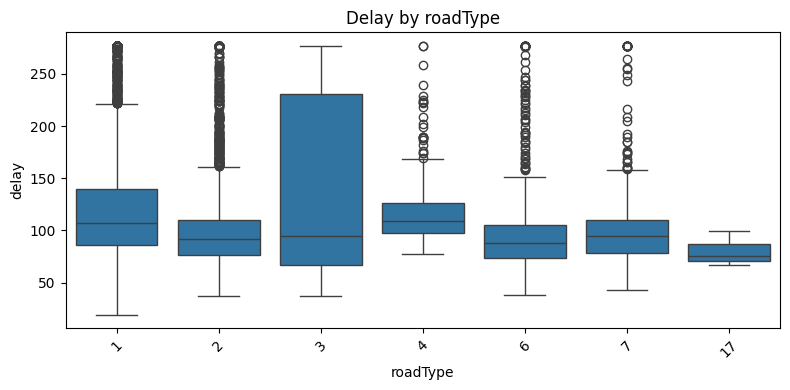

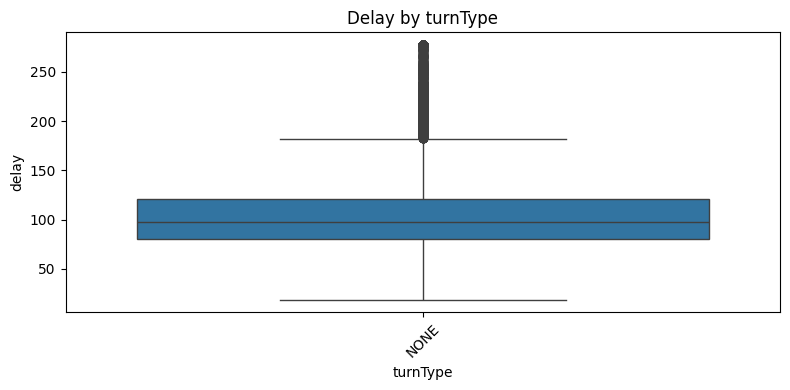

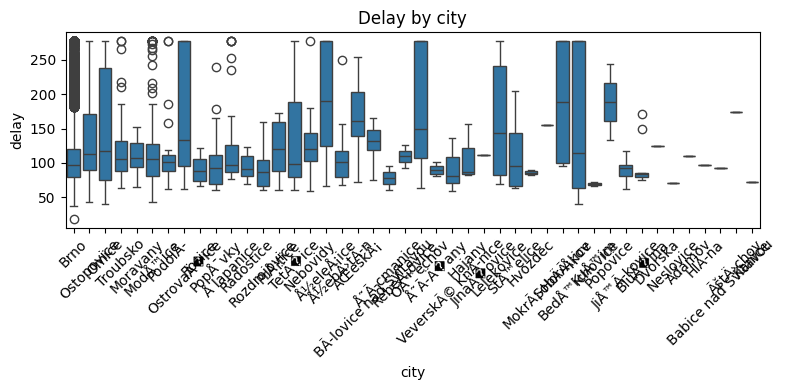

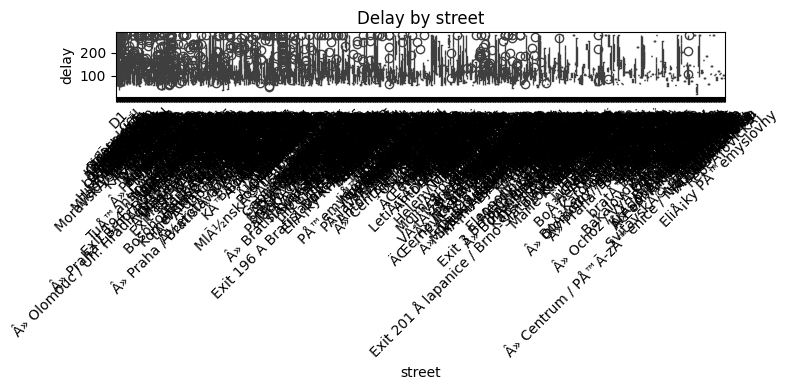

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, y='delay', data=df)
    plt.title(f'Delay by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Unique streets: 858
street
D1                      547
MoravskÃ© nÃ¡mÄ›stÃ­    199
OlomouckÃ¡              197
TÃ¡borskÃ¡              161
VÃ­deÅˆskÃ¡             156
VeveÅ™Ã­                153
Dornych                 143
Å½abovÅ™eskÃ¡           143
HnÄ›vkovskÃ©ho          131
Â» Praha / Svitavy      130
Name: count, dtype: int64


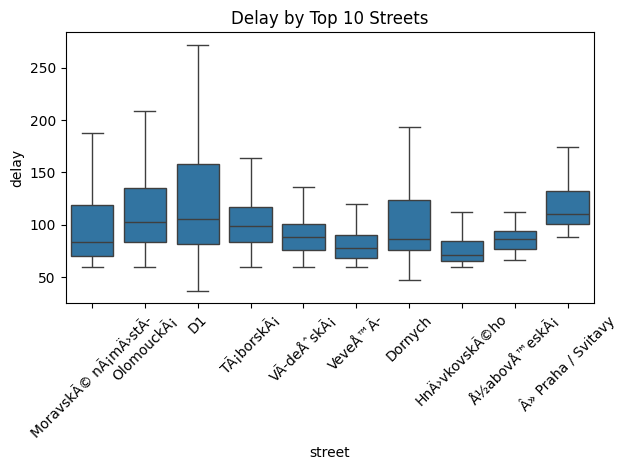

In [ ]:
print("Unique streets:", df['street'].nunique())
print(df['street'].value_counts().head(10))

# Optional bar plot of top 10 most common streets
top_streets = df['street'].value_counts().head(10).index
sns.boxplot(x='street', y='delay', data=df[df['street'].isin(top_streets)], showfliers=False)
plt.title("Delay by Top 10 Streets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

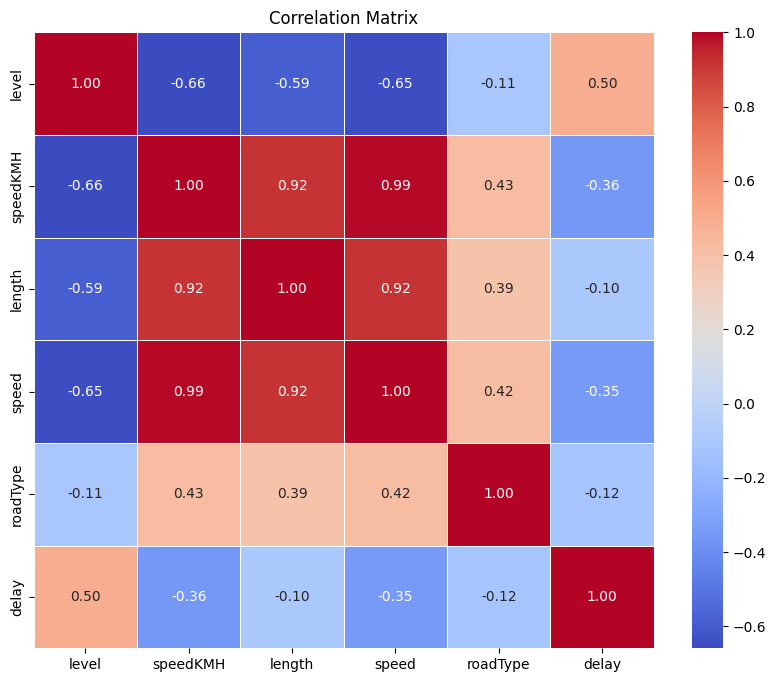

In [ ]:
# Select only numeric columns
df_numeric = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Extract unique cities from the 'city' column
unique_cities = df['city'].unique()

# Display the unique cities
print(unique_cities)

['Brno' 'Ostopovice' 'Omice' 'Troubsko' 'Moravany' 'ModÅ™ice' 'PodolÃ\xad'
 'OstrovaÄ�ice' 'Rosice' 'PopÅ¯vky' 'Å\xa0lapanice' 'Radostice'
 'Rozdrojovice' 'PrÅ¡tice' 'TetÄ�ice' 'Nebovidy' 'Å½eleÅ¡ice'
 'Å½ebÄ›tÃ\xadn' 'ÄŒeskÃ¡' 'BÃ\xadlovice nad Svitavou' 'Å˜Ã\xadcmanice'
 'RebeÅ¡ovice' 'OÅ™echov' 'Å˜Ã\xadÄ�any' 'VeverskÃ© KnÃ\xadnice' 'Hajany'
 'JinaÄ�ovice' 'Lelekovice' 'StÅ™elice' 'Hvozdec' 'MokrÃ¡-HorÃ¡kov'
 'SobÄ›Å¡ice' 'BedÅ™ichovice' 'KuÅ™im' 'Popovice' 'JiÅ™Ã\xadkovice'
 'BluÄ�ina' 'Dvorska' 'Neslovice' 'Adamov' 'HlÃ\xadna'
 'Babice nad Svitavou' 'ÃštÄ›chov' 'Kanice']


In [ ]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 6.2 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode
import re

def decode_city(city):
    try:
        # Try decoding as UTF-8 from Latin-1/Windows-1252 (common misread source)
        return city.encode('latin1').decode('utf-8')
    except (UnicodeEncodeError, UnicodeDecodeError):
        # If decoding fails, return as-is
        return city

def clean_city_name(city):
    city = decode_city(city)           # Fix encoding
    city = unidecode(city)             # Remove accents
    city = re.sub(r'[^a-zA-Z\s]', '', city)
    city = re.sub(r'\s+', ' ', city)
    city = city.strip()

    # Manual fixes
    manual_fixes = {
    'ModAtmice': 'Modřice',
    'OstrovaAice': 'Ostrovačice',
    'TetAice': 'Tetčice',
    'A ebAtAn': 'Žebětín',
    'AOEeskA': 'Česká',
    'AAcmanice': 'Řícmanice',
    'OAtmechov': 'Ořechov',
    'AAAany': 'Říčany',
    'JinaAovice': 'Jinačovice',
    'StAtmelice': 'Střelice',
    'MokraHorakov': 'Mokrá-Horákov',
    'SobAAice': 'Soběšice',
    'BedAtmichovice': 'Bedřichovice',
    'KuAtmim': 'Kuřim',
    'JiAtmAkovice': 'Jiříkovice',
    'BluAina': 'Blučina',
    'AstAchov': 'Útěchov'
    }
    return manual_fixes.get(city, city)

# Apply to the DataFrame
df['city'] = df['city'].apply(clean_city_name)
print("Unique Cities:", df['city'].unique())


Unique Cities: ['Brno' 'Ostopovice' 'Omice' 'Troubsko' 'Moravany' 'Modřice' 'Podoli'
 'Ostrovačice' 'Rosice' 'Popuvky' 'Slapanice' 'Radostice' 'Rozdrojovice'
 'Prstice' 'Tetčice' 'Nebovidy' 'Zelesice' 'Žebětín' 'Česká'
 'Bilovice nad Svitavou' 'Řícmanice' 'Rebesovice' 'Ořechov' 'Říčany'
 'Veverske Kninice' 'Hajany' 'Jinačovice' 'Lelekovice' 'Střelice'
 'Hvozdec' 'Mokrá-Horákov' 'Soběšice' 'Bedřichovice' 'Kuřim' 'Popovice'
 'Jiříkovice' 'Blučina' 'Dvorska' 'Neslovice' 'Adamov' 'Hlina'
 'Babice nad Svitavou' 'Útěchov' 'Kanice']


#Feature Engineering

City

In [ ]:
# Create binary indicator
df['is_Brno'] = (df['city'] == 'Brno').astype(int)

# Drop the original city column
df = df.drop(columns='city')

Street

In [ ]:
freq = df['street'].value_counts()
df['street_freq'] = df['street'].map(freq)
df.drop(columns=['street'], inplace=True)

In [ ]:
df['pubMillis'] = pd.to_datetime(df['pubMillis'],
                                  format="mixed",
                                  utc=True)
df['pubMillis'] = df['pubMillis'].dt.tz_convert('Europe/Prague')
df['hour'] = df['pubMillis'].dt.hour
df['weekday'] = df['pubMillis'].dt.weekday
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [ ]:
df.drop(columns=['blockingAlertUuid', 'pubMillis', 'turnType'], inplace=True)

In [ ]:
# Show all columns
pd.set_option('display.max_columns', None)
df.head(10)

level  speedKMH  length  speed  roadType  delay  is_Brno  street_freq  \
0       3         9     427      3         2     69        1          199   
1       2        22    1197      6         7    103        1           45   
2       3        19     752      5         2     87        1           27   
3       3        18     716      5         7     93        1          197   
4       2        38    1614     11         3    138        0          547   
5       3         6     236      2         1     92        1          199   
6       3         6     204      2         2     62        1           95   
8       3        12     399      3         1     74        1           17   
9       3         8     417      2         2    125        1          161   
10      3        12     447      3         2     60        1          116   

    hour  weekday  is_weekend  
0     10        4           0  
1      7        1           0  
2      9        3           0  
3     15        1           0  
4     12        0           0  
5      8        5           1  
6     11        2           0  
8      8        1           0  
9     15        3           0  
10    17        3           0

# Feature Selection

## Pearson's Correlation

In [ ]:
# H₀: There is no linear relationship between other features and delay_log.
# H₁: There is a significant linear relationship between other features and delay_log.

from scipy.stats import pearsonr

for col in ['speedKMH', 'length', 'speed', 'street_freq', 'hour', 'weekday']:
    corr, p = pearsonr(df[col], df['delay'])
    print(f"{col}: correlation = {corr:.3f}, p = {p:.3f}")

speedKMH: correlation = -0.360, p = 0.000
length: correlation = -0.098, p = 0.000
speed: correlation = -0.346, p = 0.000
street_freq: correlation = 0.037, p = 0.000
hour: correlation = 0.022, p = 0.034
weekday: correlation = 0.059, p = 0.000


## t-Tests

In [ ]:
# H₀: The mean delay_log for blocked trips or weekend is equal to the mean delay for non-blocked or non-weekend trips.
# H₁: The mean delay_log for blocked or weekend trips is different from the mean delay for non-blocked or non-weekend trips.

from scipy.stats import ttest_ind

for col in ['is_weekend']:
    group1 = df[df[col] == 1]['delay']
    group0 = df[df[col] == 0]['delay']
    t_stat, p = ttest_ind(group1, group0, equal_var=False)
    print(f"{col}: t-stat = {t_stat:.3f}, p = {p:.3f}")

is_weekend: t-stat = 5.421, p = 0.000


## ANOVA

In [ ]:
# # H₀: The mean delay_log is the same across all cities.
# # H₁: The mean delay_log is different across the cities.

# from scipy.stats import f_oneway

# city_cols = [col for col in df.columns if col.startswith('city_')]
# groups = [df[df[col] == 1]['delay_log'] for col in city_cols]
# f_stat, p = f_oneway(*groups)
# print(f"City ANOVA: F = {f_stat:.3f}, p = {p:.3f}")

In [ ]:
# H₀: The mean delay is the same across all road types.
# H₁: At least one road type has a different mean delay.

import scipy.stats as stats

# ANOVA to test if delay differs by roadType
groups = [df['delay'][df['roadType'] == rt] for rt in df['roadType'].unique()]
f_stat, p_val = stats.f_oneway(*groups)
print("ANOVA F-statistic:", f_stat, " | p-value:", p_val)

ANOVA F-statistic: 91.98062686480726  | p-value: 9.958365761886714e-113


## Spearman Correlation

In [ ]:
# H₀: There is no monotonic relationship between traffic level and delay.
# H₁: There is a monotonic relationship between traffic level and delay.

from scipy.stats import spearmanr

rho, p_val = spearmanr(df['level'], df['delay'])
print("Spearman correlation:", rho, " | p-value:", p_val)

Spearman correlation: 0.6256680210467954  | p-value: 0.0


In [ ]:
# Drooping weekday since its p-value = 0.245, which is not statistically significant.
# df = df.drop(columns=['weekday'])

In [ ]:
df.head(10)

level  speedKMH  length  speed  roadType  delay  is_Brno  street_freq  \
0       3         9     427      3         2     69        1          199   
1       2        22    1197      6         7    103        1           45   
2       3        19     752      5         2     87        1           27   
3       3        18     716      5         7     93        1          197   
4       2        38    1614     11         3    138        0          547   
5       3         6     236      2         1     92        1          199   
6       3         6     204      2         2     62        1           95   
8       3        12     399      3         1     74        1           17   
9       3         8     417      2         2    125        1          161   
10      3        12     447      3         2     60        1          116   

    hour  weekday  is_weekend  
0     10        4           0  
1      7        1           0  
2      9        3           0  
3     15        1           0  
4     12        0           0  
5      8        5           1  
6     11        2           0  
8      8        1           0  
9     15        3           0  
10    17        3           0

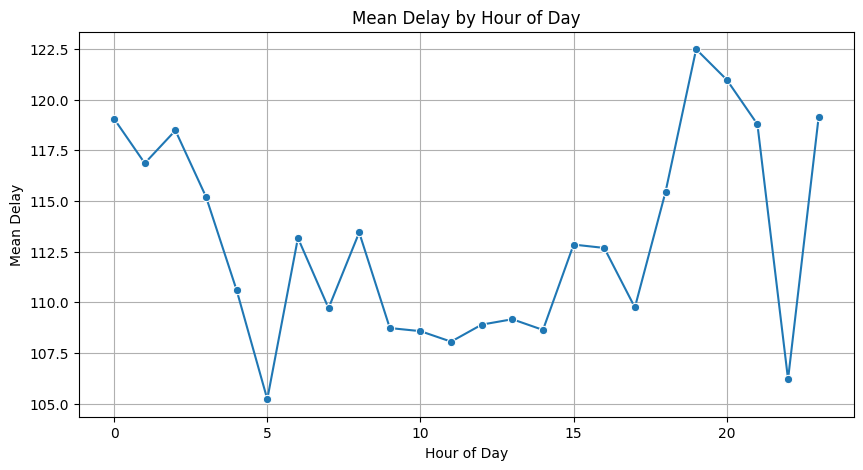

In [ ]:
delay_by_hour = df.groupby('hour')['delay'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=delay_by_hour.index, y=delay_by_hour.values, marker='o')
plt.title("Mean Delay by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Mean Delay")
plt.grid(True)
plt.show()

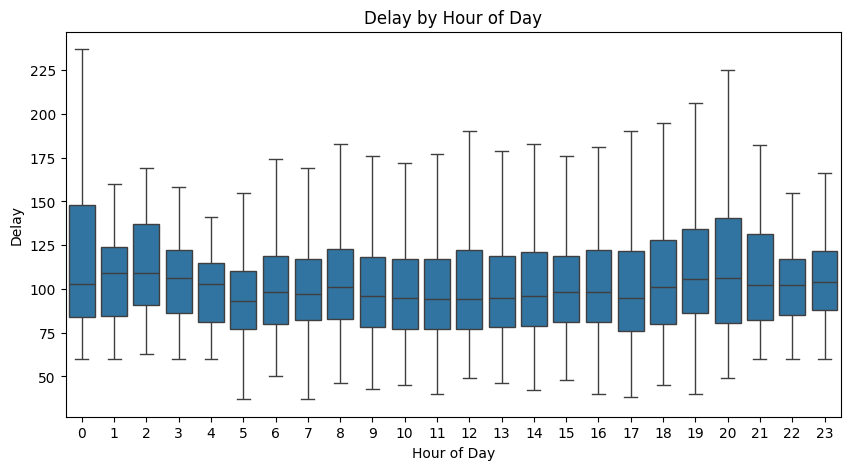

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='hour', y='delay', data=df, showfliers=False)
plt.title("Delay by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Delay")
plt.show()

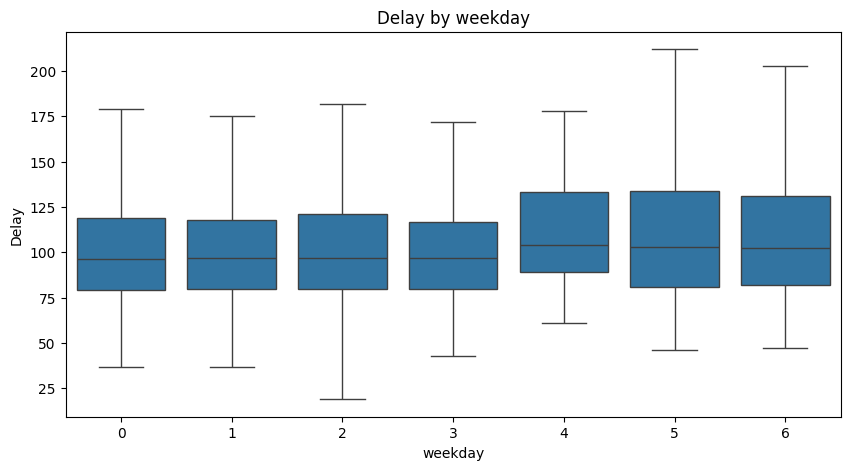

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='weekday', y='delay', data=df, showfliers=False)
plt.title("Delay by weekday")
plt.xlabel("weekday")
plt.ylabel("Delay")
plt.show()

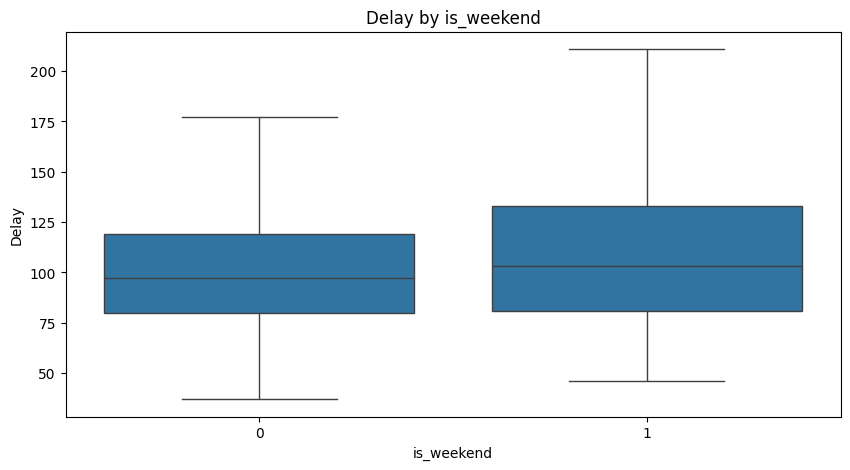

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='is_weekend', y='delay', data=df, showfliers=False)
plt.title("Delay by is_weekend")
plt.xlabel("is_weekend")
plt.ylabel("Delay")
plt.show()

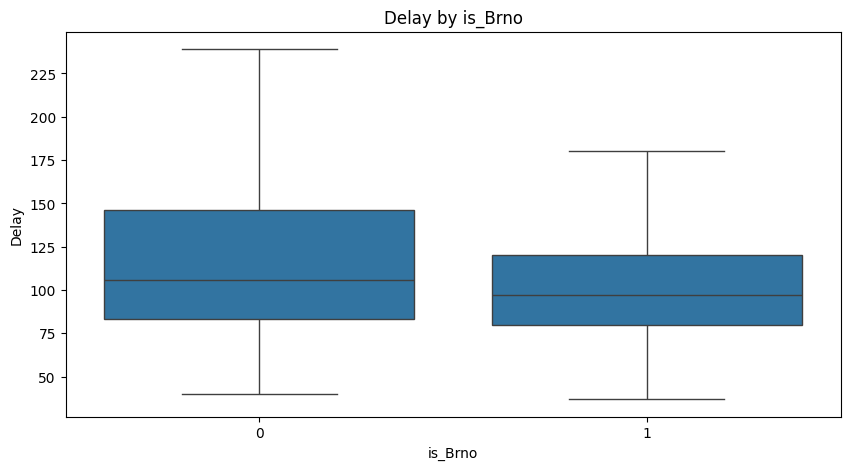

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='is_Brno', y='delay', data=df, showfliers=False)
plt.title("Delay by is_Brno")
plt.xlabel("is_Brno")
plt.ylabel("Delay")
plt.show()

# Modelling

## Train test split

In [ ]:
# Define X and y
X = df.drop(columns=['delay'])  # Only drop target
y = df['delay']

In [ ]:
from sklearn.model_selection import train_test_split

# Split once at the beginning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RFECV

In [ ]:
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

def run_rfecv_for_model(name, model, X_train, y_train):
    print(f"\n🔍 Running RFECV for {name}...")

    try:
        cv = KFold(n_splits=5, shuffle=True, random_state=42)

        selector = RFECV(
            estimator=model,
            step=1,
            cv=cv,
            scoring='r2',
            n_jobs=-1,
            min_features_to_select=2,
            importance_getter='auto'
        )
        selector.fit(X_train, y_train)

        selected_features = X_train.columns[selector.support_].tolist()
        best_score = max(selector.cv_results_['mean_test_score'])

        print(f"✅ Selected features for {name}: {selected_features}")
        print(f"📈 Best R² score (CV only): {best_score:.4f}")

        # Plot RFECV performance curve
        feature_counts = range(selector.min_features_to_select,
                       selector.min_features_to_select + len(selector.cv_results_['mean_test_score']))
        plt.figure(figsize=(8, 5))
        plt.plot(feature_counts, selector.cv_results_['mean_test_score'], marker='o')
        plt.xlabel("Number of Features Selected")
        plt.ylabel("Cross-Validation R² Score")
        plt.title(f"RFECV for {name}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        return selected_features, best_score, selector

    except Exception as e:
        print(f"❌ RFECV failed for {name} due to: {e}")
        return None, None, None


🔍 Running RFECV for Random Forest...
✅ Selected features for Random Forest: ['level', 'speedKMH', 'length', 'speed', 'roadType', 'is_Brno', 'street_freq', 'hour', 'weekday', 'is_weekend']
📈 Best R² score (CV only): 0.8867


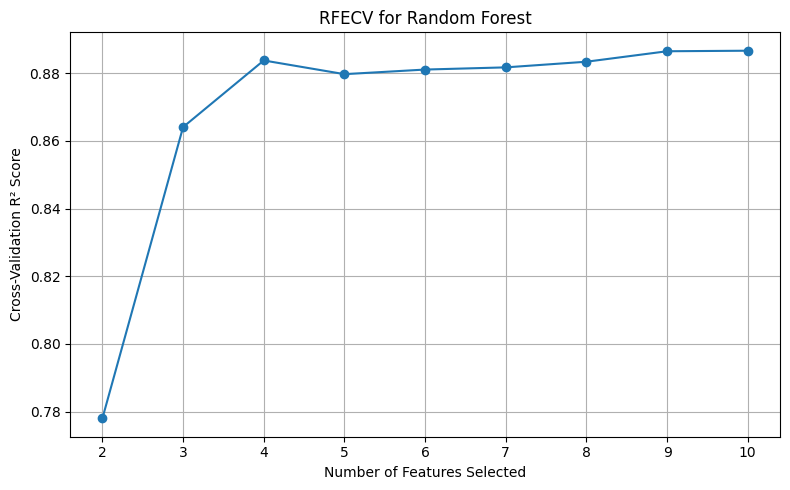

🎯 Final Test R² Score: 0.8645


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

rf_features, rf_score, rf_selector = run_rfecv_for_model(
    "Random Forest", rf_model, X_train, y_train
)

# 4. Train model on selected features
rf_model.fit(X_train[rf_features], y_train)

# 5. Evaluate on test set
y_pred = rf_model.predict(X_test[rf_features])
test_r2 = r2_score(y_test, y_pred)
print(f"🎯 Final Test R² Score: {test_r2:.4f}")


🔍 Running RFECV for XGBoost...
✅ Selected features for XGBoost: ['level', 'speedKMH', 'length', 'speed', 'roadType', 'is_Brno', 'street_freq']
📈 Best R² score (CV only): 0.9020


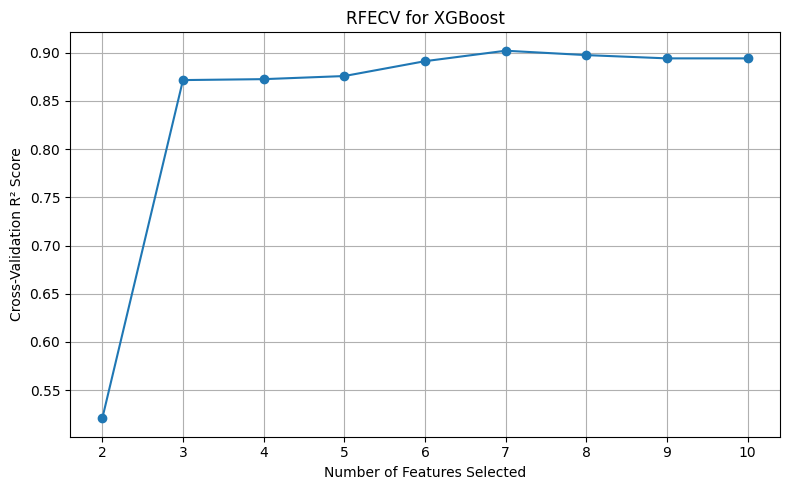

🎯 Test R² score: 0.8833


In [ ]:
from xgboost import XGBRegressor
# 2. Define your model
xgb_model = XGBRegressor(random_state=42)

# 3. Run RFECV using training set only
xgb_features, xgb_score, xgb_selector = run_rfecv_for_model(
    "XGBoost", xgb_model, X_train, y_train
)

# 4. Train model with selected features
xgb_model.fit(X_train[xgb_features], y_train)

# 5. Evaluate on test set
from sklearn.metrics import r2_score

y_pred = xgb_model.predict(X_test[xgb_features])
r2 = r2_score(y_test, y_pred)
print(f"🎯 Test R² score: {r2:.4f}")


🔍 Running RFECV for Linear Regression...
✅ Selected features for Linear Regression: ['level', 'speedKMH', 'length', 'speed', 'roadType', 'is_Brno', 'street_freq', 'hour', 'weekday', 'is_weekend']
📈 Best R² score (CV only): 0.5957


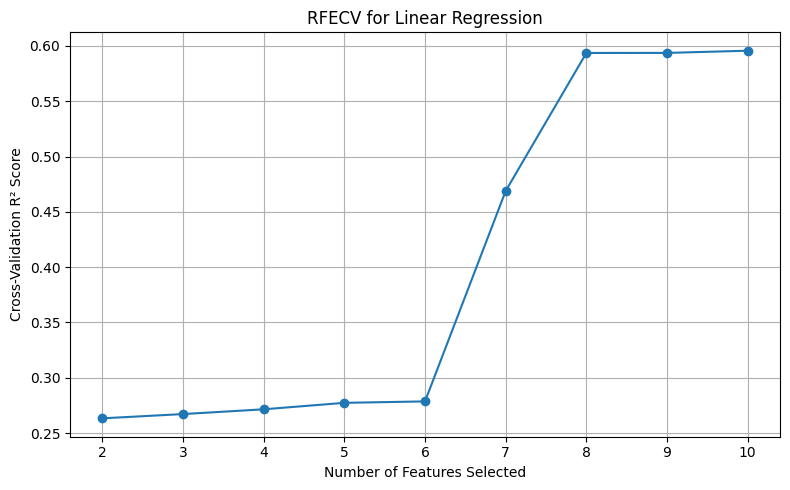

🎯 Final Test R² Score (Linear Regression): 0.6093


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

# 3. Run RFECV on training data
lr_features, lr_score, lr_selector = run_rfecv_for_model(
    "Linear Regression", lr_model, X_train, y_train
)

# 4. Train the model on selected features
lr_model.fit(X_train[lr_features], y_train)

# 5. Evaluate on test set
y_pred = lr_model.predict(X_test[lr_features])
test_r2 = r2_score(y_test, y_pred)
print(f"🎯 Final Test R² Score (Linear Regression): {test_r2:.4f}")

✅ Best features: ('level', 'speedKMH', 'length', 'is_Brno')
📈 Best Cross-Validated R² Score (Training): 0.8558


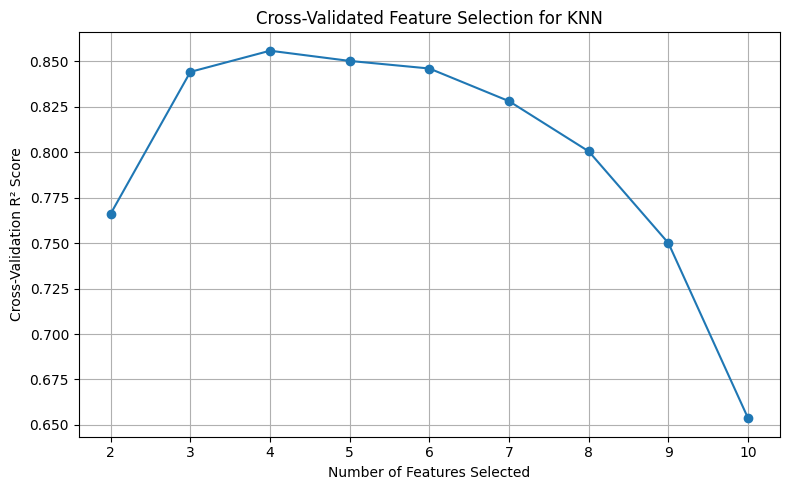

🎯 Final Test R² Score (KNN): 0.8243


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from itertools import combinations
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Feature selection using cross-validation
best_score = -np.inf
knn_features = []
results = []  # Store (num_features, score) for plotting

for k in range(2, len(X.columns) + 1):
    for combo in combinations(X.columns, k):
        X_train_combo = X_train[list(combo)]

        # Pipeline: scaling + KNN
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('knn', KNeighborsRegressor())
        ])

        score = cross_val_score(
            pipeline, X_train_combo, y_train,
            scoring='r2', cv=5, n_jobs=-1
        ).mean()

        # Store result for plotting
        results.append((len(combo), score))

        # Track best combination
        if score > best_score:
            best_score = score
            knn_features = combo

print("✅ Best features:", knn_features)
print(f"📈 Best Cross-Validated R² Score (Training): {best_score:.4f}")

# 2. Aggregate best score for each number of features (for RFECV-like plot)
feature_counts = sorted(set(f for f, _ in results))
best_scores = [max(s for f, s in results if f == count) for count in feature_counts]

# Plot like RFECV
plt.figure(figsize=(8, 5))
plt.plot(feature_counts, best_scores, marker='o')
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation R² Score")
plt.title("Cross-Validated Feature Selection for KNN")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Final model evaluation using the selected features
knn_X_train_selected = X_train[list(knn_features)]
knn_X_test_selected = X_test[list(knn_features)]

final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

final_pipeline.fit(knn_X_train_selected, y_train)
y_pred = final_pipeline.predict(knn_X_test_selected)

test_r2 = r2_score(y_test, y_pred)
print(f"🎯 Final Test R² Score (KNN): {test_r2:.4f}")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define the parameter grid (note the 'knn__' prefix)
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2],                 # 1 = Manhattan, 2 = Euclidean
    'knn__leaf_size': [20, 30, 40],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on selected training features
grid_search.fit(knn_X_train_selected, y_train)

# Best model
best_knn = grid_search.best_estimator_
print("✅ Best KNN Params:", grid_search.best_params_)
print("📈 Best Cross-Validated R² on Train:", grid_search.best_score_)

# Predict using test data
y_pred = best_knn.predict(knn_X_test_selected)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAPE implementation
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = mape(y_test, y_pred)

# Print results
print(f"🎯 Final Test R²: {r2:.4f}")
print(f"📉 MAE: {mae:.4f}")
print(f"📉 RMSE: {rmse:.4f}")
print(f"📉 MAPE: {mape_score:.2f}%")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
✅ Best KNN Params: {'knn__algorithm': 'ball_tree', 'knn__leaf_size': 30, 'knn__n_neighbors': 13, 'knn__p': 1, 'knn__weights': 'distance'}
📈 Best Cross-Validated R² on Train: 0.8600185122820563
🎯 Final Test R²: 0.8270
📉 MAE: 11.5629
📉 RMSE: 19.9755
📉 MAPE: 10.83%


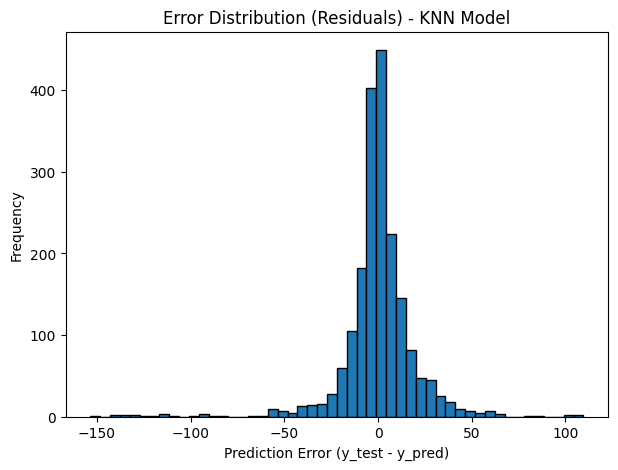

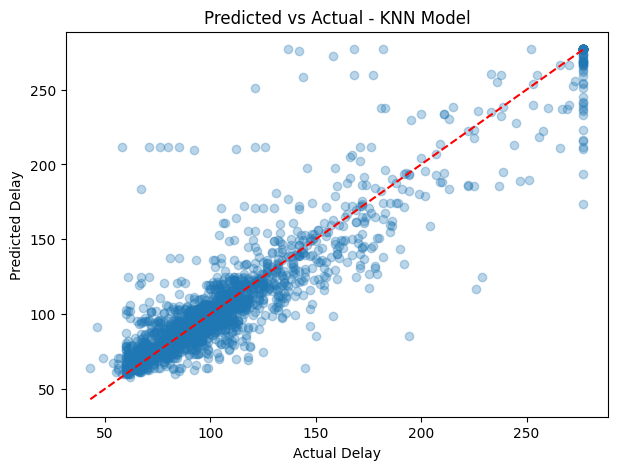

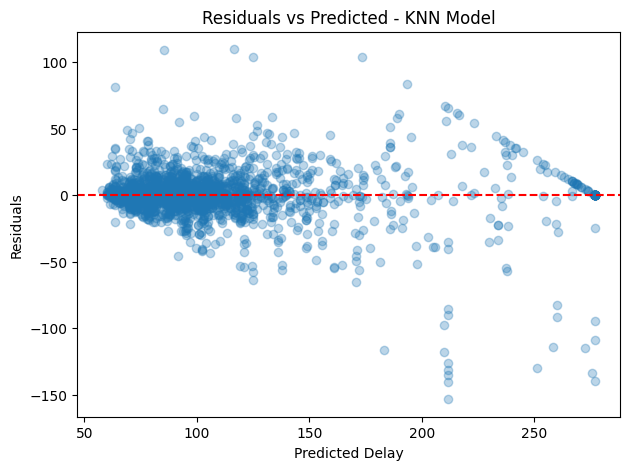

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on test set
y_pred = best_knn.predict(knn_X_test_selected)

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=50, edgecolor="black")
plt.title("Error Distribution (Residuals) - KNN Model")
plt.xlabel("Prediction Error (y_test - y_pred)")
plt.ylabel("Frequency")
plt.show()

# Scatter plot: predicted vs actual
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # ideal line
plt.title("Predicted vs Actual - KNN Model")
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.show()

# Optional: Residuals vs Predicted (check for patterns)
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predicted - KNN Model")
plt.xlabel("Predicted Delay")
plt.ylabel("Residuals")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Use only the best features you selected earlier
rf_X_train_selected = X_train[list(rf_features)]
rf_X_test_selected = X_test[list(rf_features)]

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(rf_X_train_selected, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("✅ Best Random Forest Params:", grid_search.best_params_)
print("📈 Best Cross-Validated R² on Train:", grid_search.best_score_)

# Final test evaluation
y_pred = best_rf.predict(rf_X_test_selected)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAPE implementation
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = mape(y_test, y_pred)

# Print results
print(f"🎯 Final Test R²: {r2:.4f}")
print(f"📉 MAE: {mae:.4f}")
print(f"📉 RMSE: {rmse:.4f}")
print(f"📉 MAPE: {mape_score:.2f}%")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
✅ Best Random Forest Params: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
📈 Best Cross-Validated R² on Train: 0.8881876322096363
🎯 Final Test R²: 0.8755
📉 MAE: 9.9728
📉 RMSE: 16.9461
📉 MAPE: 9.21%


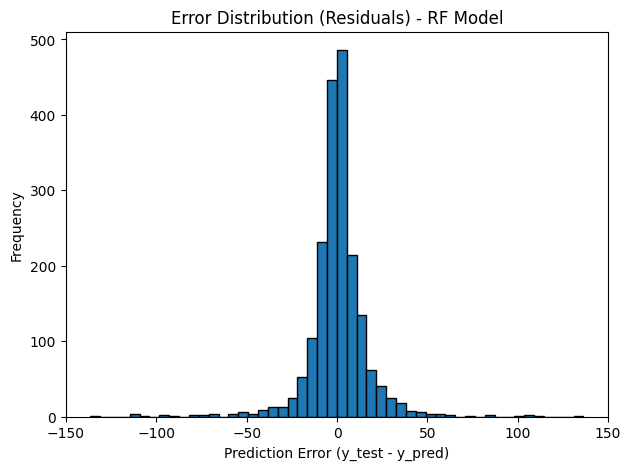

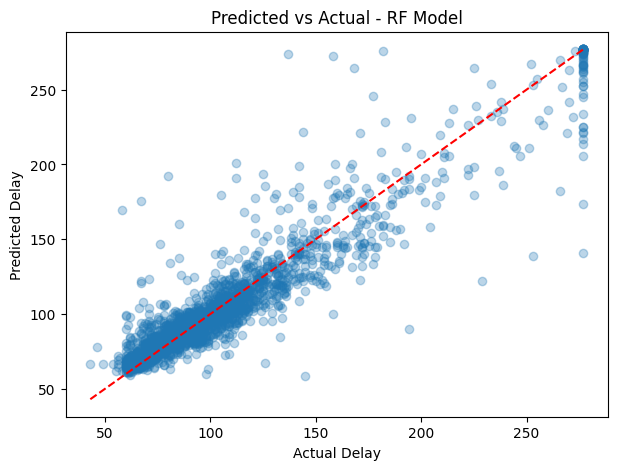

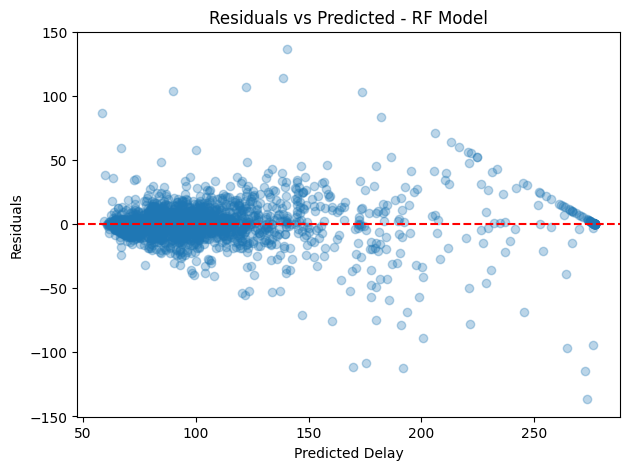

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on test set
y_pred = best_rf.predict(rf_X_test_selected)

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=50, edgecolor="black")
plt.title("Error Distribution (Residuals) - RF Model")
plt.xlabel("Prediction Error (y_test - y_pred)")
plt.ylabel("Frequency")
plt.show()

# Scatter plot: predicted vs actual
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # ideal line
plt.title("Predicted vs Actual - RF Model")
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.show()

# Optional: Residuals vs Predicted (check for patterns)
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predicted - RF Model")
plt.xlabel("Predicted Delay")
plt.ylabel("Residuals")
plt.show()


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Use only the best features you selected earlier
xgb_X_train_selected = X_train[list(xgb_features)]
xgb_X_test_selected = X_test[list(xgb_features)]

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42, verbosity=0),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(xgb_X_train_selected, y_train)

# Best model
best_xgb = grid_search.best_estimator_
print("✅ Best XGBoost Params:", grid_search.best_params_)
print("📈 Best Cross-Validated R² on Train:", grid_search.best_score_)

# Final test evaluation
y_pred = best_xgb.predict(xgb_X_test_selected)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAPE implementation
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = mape(y_test, y_pred)

print(f"🎯 Final Test R²: {r2:.4f}")
print(f"📉 MAE: {mae:.4f}")
print(f"📉 RMSE: {rmse:.4f}")
print(f"📉 MAPE: {mape_score:.2f}%")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
✅ Best XGBoost Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 600, 'subsample': 1.0}
📈 Best Cross-Validated R² on Train: 0.9019606113433838
🎯 Final Test R²: 0.8933
📉 MAE: 9.2007
📉 RMSE: 15.6918
📉 MAPE: 8.56%


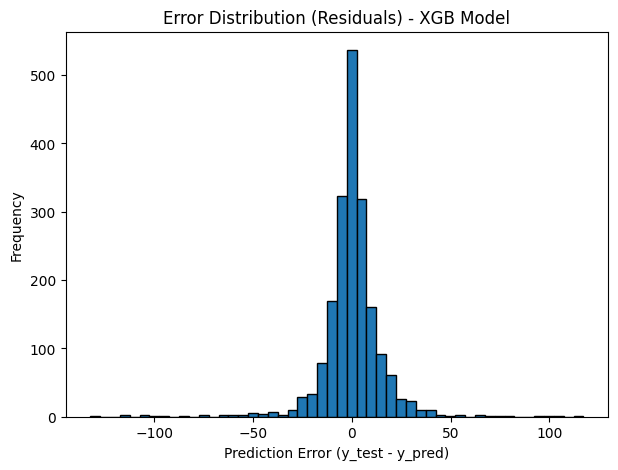

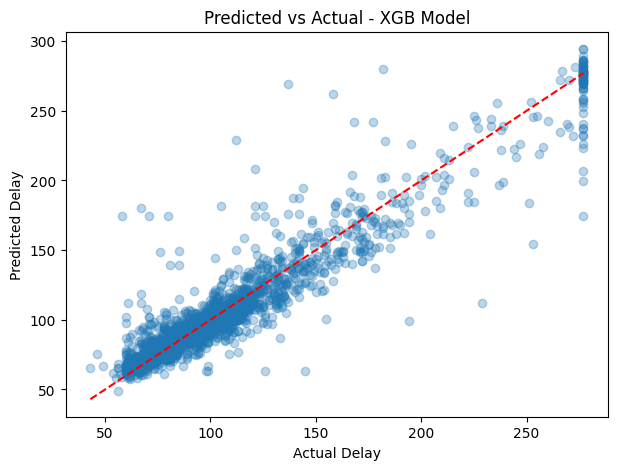

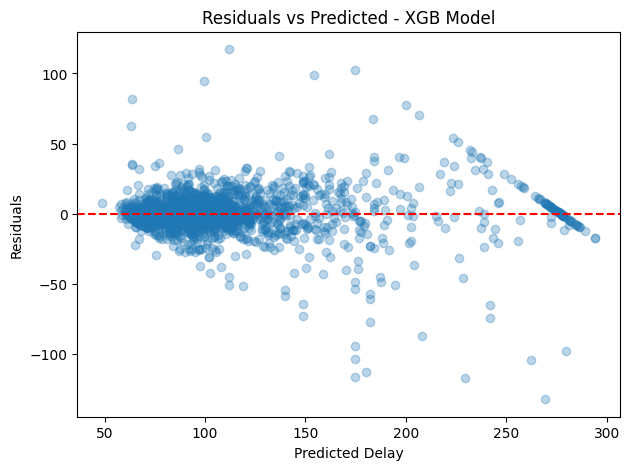

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on test set
y_pred = best_xgb.predict(xgb_X_test_selected)

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=50, edgecolor="black")
plt.title("Error Distribution (Residuals) - XGB Model")
plt.xlabel("Prediction Error (y_test - y_pred)")
plt.ylabel("Frequency")
plt.show()

# Scatter plot: predicted vs actual
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # ideal line
plt.title("Predicted vs Actual - XGB Model")
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.show()

# Optional: Residuals vs Predicted (check for patterns)
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predicted - XGB Model")
plt.xlabel("Predicted Delay")
plt.ylabel("Residuals")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Use only selected features
lr_X_train_selected = X_train[list(lr_features)]
lr_X_test_selected = X_test[list(lr_features)]

# Optional parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'positive': [False, True],       # Only in sklearn >= 0.24
    'copy_X': [True, False],          # Whether to copy X or overwrite
    'n_jobs': [None, -1]              # Parallelize computation over targets
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit only on training set
grid_search.fit(lr_X_train_selected, y_train)

# Best model
best_lr = grid_search.best_estimator_
print("✅ Best Linear Regression Params:", grid_search.best_params_)
print("📈 Best Cross-Validated R² on Train:", grid_search.best_score_)

# Final test evaluation
y_pred = best_lr.predict(lr_X_test_selected)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# MAPE implementation
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = mape(y_test, y_pred)

# Print results
print(f"🎯 Final Test R²: {r2:.4f}")
print(f"📉 MAE: {mae:.4f}")
print(f"📉 RMSE: {rmse:.4f}")
print(f"📉 MAPE: {mape_score:.2f}%")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Best Linear Regression Params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
📈 Best Cross-Validated R² on Train: 0.5960807910497127
🎯 Final Test R²: 0.6093
📉 MAE: 20.8735
📉 RMSE: 30.0213
📉 MAPE: 19.79%


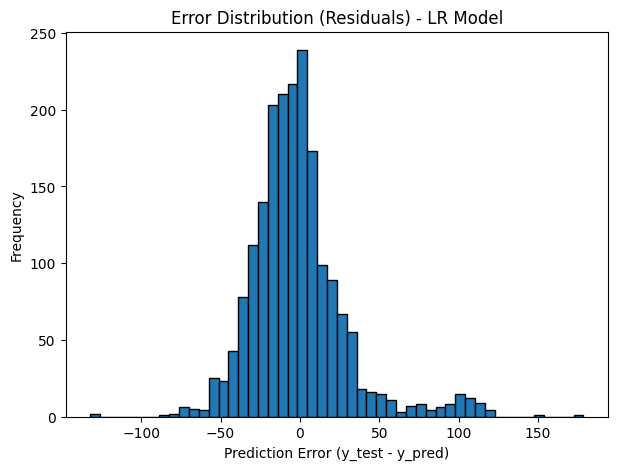

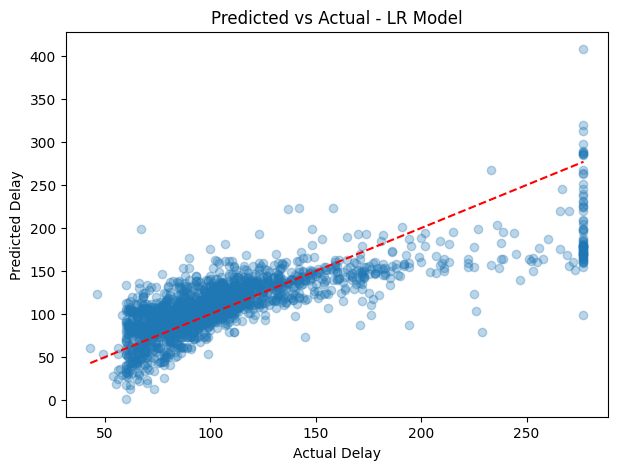

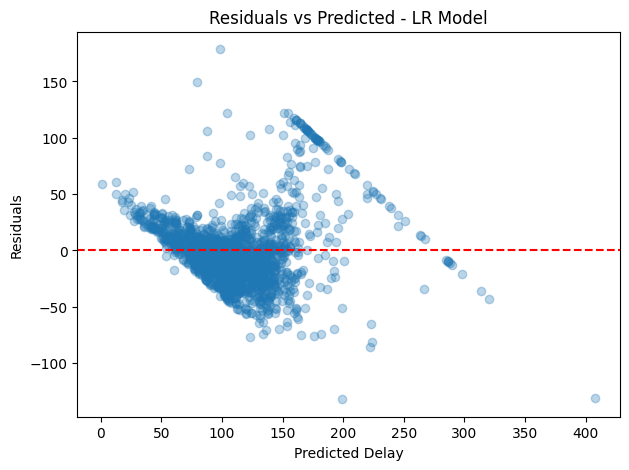

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on test set
y_pred = best_lr.predict(lr_X_test_selected)

# Calculate residuals (errors)
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=50, edgecolor="black")
plt.title("Error Distribution (Residuals) - LR Model")
plt.xlabel("Prediction Error (y_test - y_pred)")
plt.ylabel("Frequency")
plt.show()

# Scatter plot: predicted vs actual
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # ideal line
plt.title("Predicted vs Actual - LR Model")
plt.xlabel("Actual Delay")
plt.ylabel("Predicted Delay")
plt.show()

# Optional: Residuals vs Predicted (check for patterns)
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predicted - LR Model")
plt.xlabel("Predicted Delay")
plt.ylabel("Residuals")
plt.show()


# SHAP

## XGB

 98%|===================| 1888/1931 [00:43<00:00]       

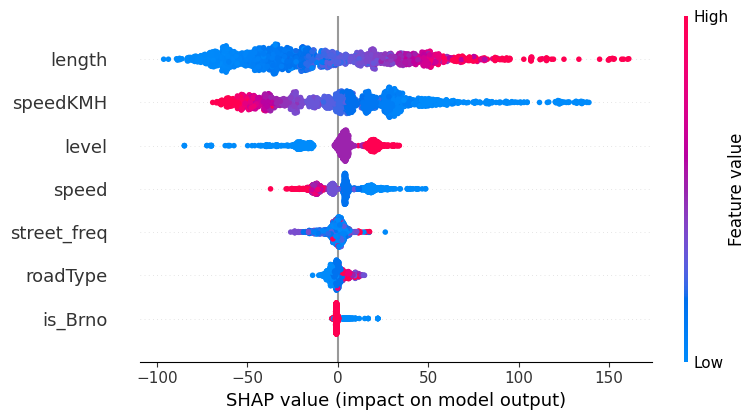

In [ ]:
import shap

# Initialize JS (required for interactive plots in Colab)
shap.initjs()

# Create explainer
explainer = shap.Explainer(best_xgb, xgb_X_train_selected)

# Compute SHAP values
shap_values = explainer(xgb_X_test_selected)

# Summary plot (feature importance)
shap.summary_plot(shap_values, xgb_X_test_selected)

# ✅ Interactive force plot for the first prediction
shap.force_plot(
    explainer.expected_value,
    shap_values[4].values,
    shap_values[4].data,
    feature_names=xgb_X_test_selected.columns
)

In [ ]:
# Initialize JS (required for interactive plots in Colab)
shap.initjs()

# ✅ Interactive force plot for the first prediction
shap.force_plot(
    explainer.expected_value,
    shap_values[9].values,
    shap_values[9].data,
    feature_names=xgb_X_test_selected.columns
)

## RF

100%|===================| 1926/1931 [05:47<00:00]       

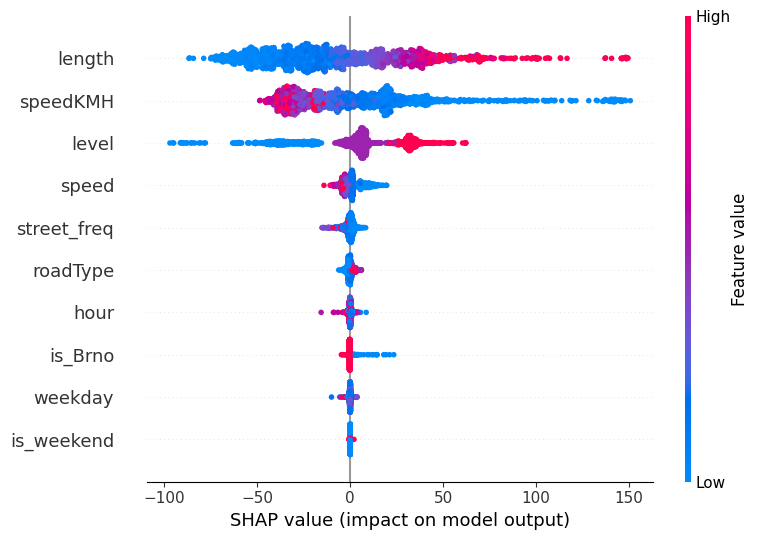

In [ ]:
import shap

# Initialize JS (required for interactive plots in Colab)
shap.initjs()

# Create explainer
explainer = shap.Explainer(best_rf, rf_X_train_selected)

# Compute SHAP values
shap_values = explainer(rf_X_test_selected)

# Summary plot (feature importance)
shap.summary_plot(shap_values, rf_X_test_selected)

# ✅ Interactive force plot for the first prediction
shap.force_plot(
    explainer.expected_value,
    shap_values[0].values,
    shap_values[0].data,
    feature_names=xgb_X_test_selected.columns
)

## LR

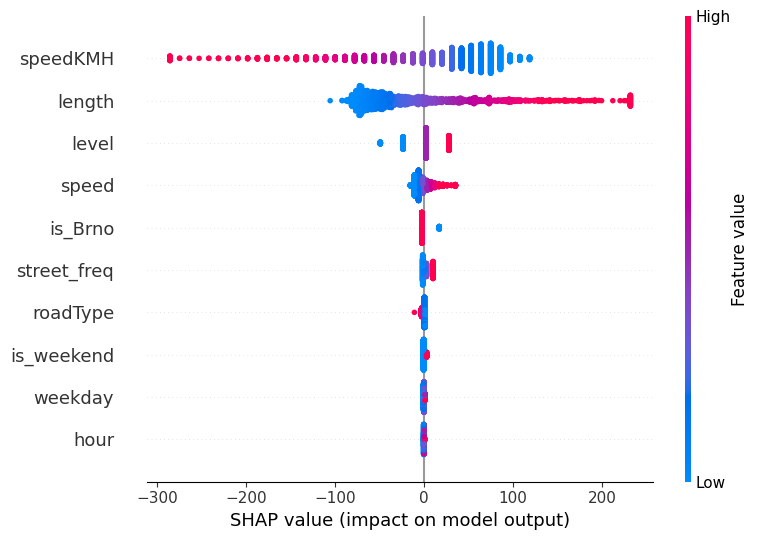

In [ ]:
# Initialize JS (required for interactive plots in Colab)
shap.initjs()

# Create explainer
explainer = shap.Explainer(best_lr, lr_X_train_selected)

# Compute SHAP values
shap_values = explainer(lr_X_test_selected)

# Summary plot (feature importance)
shap.summary_plot(shap_values, lr_X_test_selected)

## KNN

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

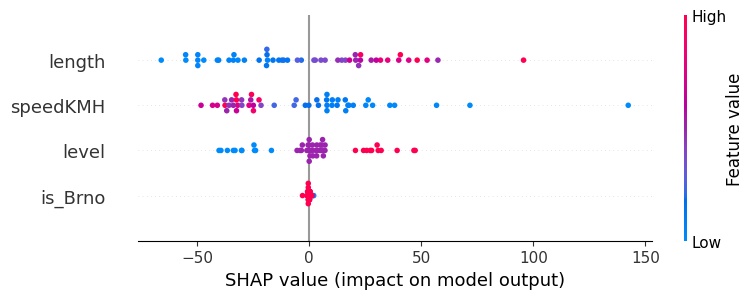

In [ ]:
import shap
import numpy as np

# Convert training & test to NumPy arrays
X_train_np = knn_X_train_selected.to_numpy()
X_test_np = knn_X_test_selected.to_numpy()
feature_names = knn_X_train_selected.columns

# Wrap prediction so SHAP doesn’t touch feature_names_in_
def knn_predict(X):
    return best_knn.predict(X)

# Background sample for KernelExplainer
background = shap.sample(X_train_np, 100, random_state=42)

# Initialize KernelExplainer with wrapped predict function
explainer = shap.KernelExplainer(knn_predict, background)

# Explain only a subset for speed (e.g., first 50 rows)
shap_values = explainer.shap_values(X_test_np[:50])

# Summary plot with explicit feature names
shap.summary_plot(shap_values, X_test_np[:50], feature_names=feature_names)


# Deployment

In [ ]:
df_street = pd.read_csv("/content/drive/MyDrive/Dataset/Traffic_dataset.csv")

# Recalculate frequency
freq = df_street['street'].value_counts()
df_street['street_freq'] = df_street['street'].map(freq)

In [ ]:
# Create a unique mapping: street → street_freq
street_freq_df = df_street[['street', 'street_freq']].drop_duplicates()

# Save it for later use in your app
street_freq_df.to_csv("street_freq_lookup.csv", index=False)

In [ ]:
import joblib

# Save model to a file
joblib.dump(best_xgb, 'delay_prediction_model.pkl')

In [ ]:
import json

# Save feature names
with open('xgb_features.json', 'w') as f:
    json.dump(xgb_features, f)

In [ ]:
df.to_csv("your_data.csv", index=False)

## Run in VS code

In [ ]:
!pip install streamlit

In [ ]:
import os
import numpy as np
import pandas as pd
import streamlit as st
import joblib

# Map / geocoding
import folium
from streamlit_folium import st_folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# -----------------------------
# Config
# -----------------------------
MODEL_PKL = "delay_prediction_model_final.pkl"
STREET_LOOKUP_CSV = "street_freq_lookup_final.csv"   # columns: street, street_freq
GEOCODE_CACHE_CSV = "geocode_cache.csv"        # columns: street, is_brno, lat, lon

XGB_FEATURES = [
    "level", "speedKMH", "length", "speed", "roadType", "is_Brno", "street_freq"
]

st.set_page_config(page_title="Traffic Delay Prediction", layout="wide")
st.title("🚦 Traffic Delay Prediction Dashboard")
st.caption("Type/select a street, predict delay, and view its position on the map (auto geocoding).")

# -----------------------------
# Session State (to persist prediction)
# -----------------------------
if "pred_raw" not in st.session_state:
    st.session_state.pred_raw = None
if "pred_shown" not in st.session_state:
    st.session_state.pred_shown = None

# -----------------------------
# Load model
# -----------------------------
if not os.path.exists(MODEL_PKL):
    st.error(f"Model file not found: {MODEL_PKL}")
    st.stop()

model = joblib.load(MODEL_PKL)

# -----------------------------
# Load street frequency lookup
# -----------------------------
if not os.path.exists(STREET_LOOKUP_CSV):
    st.warning(f"`{STREET_LOOKUP_CSV}` not found. street_freq will default to 1.")
    street_lookup_df = pd.DataFrame(columns=["street", "street_freq"])
else:
    street_lookup_df = (
        pd.read_csv(STREET_LOOKUP_CSV)
        .loc[:, ["street", "street_freq"]]
        .dropna()
        .drop_duplicates(subset="street", keep="first")
    )

# Filter: only streets with letters
if not street_lookup_df.empty:
    mask_has_letter = street_lookup_df["street"].astype(str).str.contains(r"[^\W\d_]", regex=True)
    filtered_lookup_df = street_lookup_df[mask_has_letter].copy()
    if filtered_lookup_df.empty:
        filtered_lookup_df = street_lookup_df.copy()
else:
    filtered_lookup_df = street_lookup_df.copy()

# Dict (keeps all streets so mapping still works for typed names)
street_freq_dict = dict(zip(street_lookup_df["street"], street_lookup_df["street_freq"]))

# -----------------------------
# Geocoder + cache
# -----------------------------
@st.cache_data(show_spinner=False)
def init_mem_cache():
    return {}
mem_cache = init_mem_cache()

def load_persistent_cache():
    if os.path.exists(GEOCODE_CACHE_CSV):
        try:
            dfc = pd.read_csv(GEOCODE_CACHE_CSV)
            if {"street","is_brno","lat","lon"}.issubset(dfc.columns):
                return dfc
        except Exception:
            pass
    return pd.DataFrame(columns=["street","is_brno","lat","lon"])

def upsert_persistent_cache(street, is_brno, lat, lon):
    dfc = load_persistent_cache()
    mask = (dfc["street"] == street) & (dfc["is_brno"] == is_brno)
    if mask.any():
        dfc.loc[mask, ["lat", "lon"]] = [lat, lon]
    else:
        dfc = pd.concat([dfc, pd.DataFrame([{
            "street": street, "is_brno": is_brno, "lat": lat, "lon": lon
        }])], ignore_index=True)
    dfc.to_csv(GEOCODE_CACHE_CSV, index=False)

persist_cache_df = load_persistent_cache()

_geolocator = Nominatim(user_agent="traffic_delay_app/1.0")
_geocode = RateLimiter(_geolocator.geocode, min_delay_seconds=1.0, swallow_exceptions=True)

def _mem_key(street, is_brno):
    return f"{street}||{is_brno}"

def geocode_street(street: str, is_brno: int):
    """Return (lat, lon) with cache + geocoding."""
    if not street or not isinstance(street, str) or not street.strip():
        return (None, None)

    key = _mem_key(street, is_brno)
    if key in mem_cache:
        return mem_cache[key]

    mask = (persist_cache_df["street"] == street) & (persist_cache_df["is_brno"] == is_brno)
    if mask.any():
        lat = float(persist_cache_df.loc[mask, "lat"].values[0])
        lon = float(persist_cache_df.loc[mask, "lon"].values[0])
        mem_cache[key] = (lat, lon)
        return (lat, lon)

    context = "Brno, Czechia" if is_brno == 1 else "South Moravian, Czechia"
    query = f"{street}, {context}"
    location = _geocode(query, exactly_one=True, addressdetails=False)

    if location is None:
        location = _geocode(street, exactly_one=True, addressdetails=False)

    if location is not None:
        lat, lon = float(location.latitude), float(location.longitude)
        mem_cache[key] = (lat, lon)
        upsert_persistent_cache(street, is_brno, lat, lon)
        return (lat, lon)

    return (None, None)

# -----------------------------
# Sidebar inputs
# -----------------------------
st.sidebar.header("🔧 Input Road Features")

# Street dropdown (filtered)
if filtered_lookup_df.empty:
    street_name = st.sidebar.text_input("Street Name", "Lidická")
else:
    street_name = st.sidebar.selectbox(
        "Street Name",
        sorted(filtered_lookup_df["street"].unique().tolist()),
        index=0
    )

ROAD_TYPE_MAP = {
    1: "Streets",
    2: "Primary Street",
    3: "Freeways",
    4: "Ramps",
    6: "Primary",
    7: "Secondary",
    17: "Private road"
}

# Other inputs
level      = st.sidebar.selectbox("Traffic Level (0=Free flow, 5=Blocked)", [1,2,3,4], index=3)
road_type = st.sidebar.selectbox("Select Road Type", list(ROAD_TYPE_MAP.values()))

# Convert selected name back to numeric code for the model
road_type_num = {v: k for k, v in ROAD_TYPE_MAP.items()}[road_type]

# Single speed input (convert internally)
speed_unit = st.sidebar.radio("Speed unit", ["km/h", "m/s"], index=0)
if speed_unit == "km/h":
    speed_input = st.sidebar.slider("Speed (km/h)", 1.0, 45.0, 30.0)
    speed_kmh = float(speed_input)
    speed_mps = float(speed_input / 3.6)
else:
    speed_input = st.sidebar.slider("Speed (m/s)", 0.3, 15.0, 10.0)
    speed_mps = float(speed_input)
    speed_kmh = float(speed_input * 3.6)

st.sidebar.caption(f"Converted: {speed_kmh:.1f} km/h  •  {speed_mps:.2f} m/s")

# Length in meters now (slider in meters)
length_m  = st.sidebar.slider("Segment Length (meters)", 10, 2000, 300, step=10)

is_brno    = st.sidebar.radio("Is this in Brno?", [0,1], format_func=lambda x: "Yes" if x==1 else "No", index=1)

# street_freq lookup
street_freq = int(street_freq_dict.get(street_name, 1))

# -----------------------------
# Build model input
# -----------------------------
eps = 1e-6
input_df = pd.DataFrame([{
    "level": int(level),
    "roadType": int(road_type_num),
    "speedKMH": float(speed_kmh),
    "length": float(length_m),      # length now in meters
    "speed": float(speed_mps),
    "is_Brno": int(is_brno),
    "street_freq": int(street_freq)
}], columns=XGB_FEATURES)

st.markdown("#### 🧾 Model Input")
st.dataframe(input_df, use_container_width=True)

# -----------------------------
# Prediction
# -----------------------------
import shap
import streamlit.components.v1 as components

def st_shap(plot, height=None):
    """Streamlit wrapper for SHAP plots"""
    shap_html = f"<head>{shap.getjs()}</head><body>{plot.html()}</body>"
    components.html(shap_html, height=height)

# Initialize explainer (TreeExplainer works well for XGBoost, RF, etc.)
explainer = shap.TreeExplainer(model)

if st.button("🔮 Predict Delay"):
    try:
        y_pred = model.predict(input_df)[0]
        st.session_state.pred_shown = y_pred

        # Compute SHAP values for this input
        shap_values = explainer(input_df)

        # Save SHAP values to session state
        st.session_state.shap_values = shap_values
        st.session_state.input_df = input_df

        st.success(f"Predicted Delay: **{y_pred:.2f} seconds**")

    except Exception as e:
        st.error(f"Prediction failed: {e}")

# -----------------------------
# Show SHAP Force Plot if available
# -----------------------------
if "shap_values" in st.session_state and st.session_state.shap_values is not None:
    st.subheader("🔎 SHAP Force Plot (Explanation)")
    st_shap(
        shap.force_plot(
            explainer.expected_value,
            st.session_state.shap_values.values[0],
            st.session_state.input_df.iloc[0, :],
            matplotlib=False
        ),
        height=200
    )

# -----------------------------
# Map
# -----------------------------
st.markdown("---")
st.subheader("🗺️ Street Map")

default_lat, default_lon = 49.1951, 16.6068  # Brno center
lat, lon = geocode_street(street_name, int(is_brno))

if (lat is None) or (lon is None):
    st.info("Could not geocode that street. Showing Brno center as fallback.")
    lat, lon = default_lat, default_lon

popup_txt = f"Street: {street_name}"
if st.session_state.pred_shown is not None:
    popup_txt += f"<br>Predicted delay: {st.session_state.pred_shown:.1f} s"

m = folium.Map(location=[lat, lon], zoom_start=14)
folium.Marker(
    [lat, lon],
    tooltip=street_name,
    popup=folium.Popup(popup_txt, max_width=300)
).add_to(m)

st_folium(m, width=850, height=540)